In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
def fit_linear_regression(series):
    try:
        train_size = int(len(series) * 0.8)
        train, test = series[:train_size], series[train_size:]
        if len(test) < 2:
            print("Test series must contain at least 2 values.")
            return None, None
        
        X_train = np.arange(len(train)).reshape(-1, 1)
        y_train = train.values.reshape(-1, 1)
        
        X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        predictions = model.predict(X_test).flatten()
        
        rmse = np.sqrt(mean_squared_error(test, predictions))
        return predictions, rmse
    except Exception as e:
        print("An error occurred:", e)
        return None, None

In [4]:
def plot_forecast(actual, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(actual.index, actual, label='Actual')
    plt.plot(actual.index[-len(predictions):], predictions, label='Predicted')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [5]:
base_dir = '../../Datasets/Export'

Processing data in folder: Country-Wise-Time-Series...


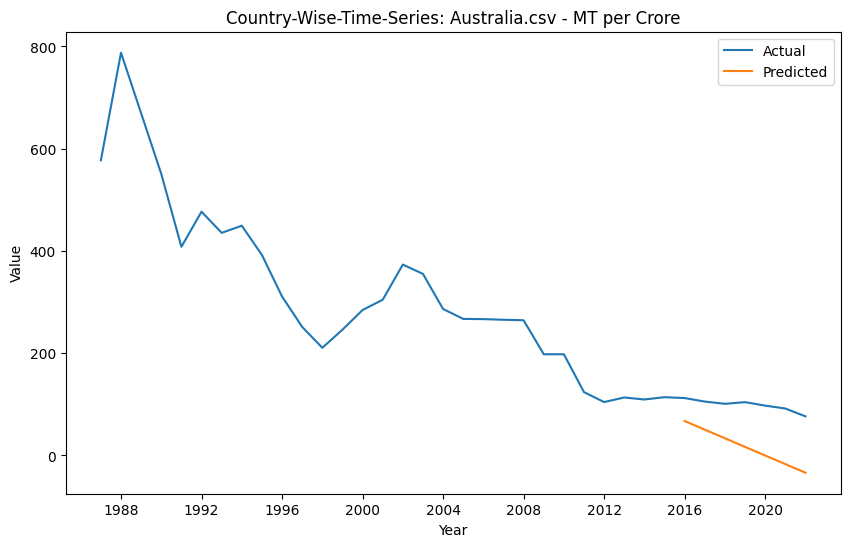

Country-Wise-Time-Series: Australia.csv - MT per Crore RMSE: 85.13846300082291


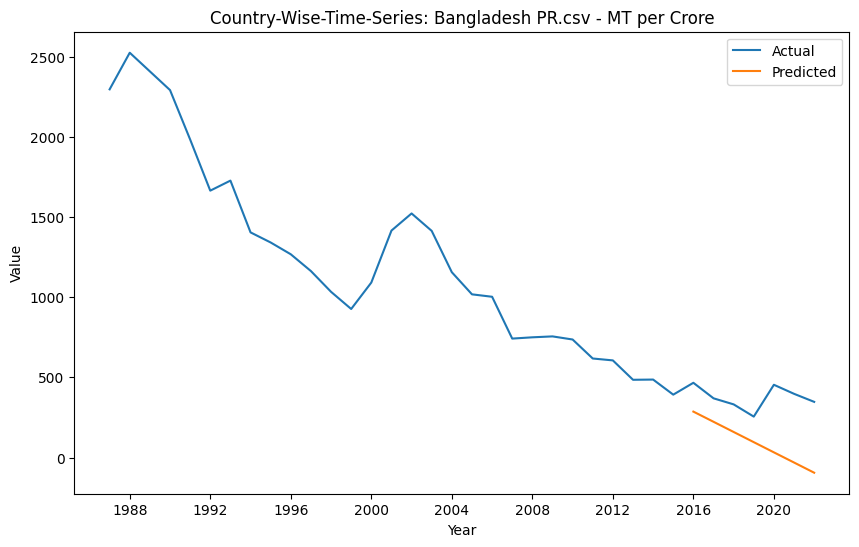

Country-Wise-Time-Series: Bangladesh PR.csv - MT per Crore RMSE: 308.2520007384634


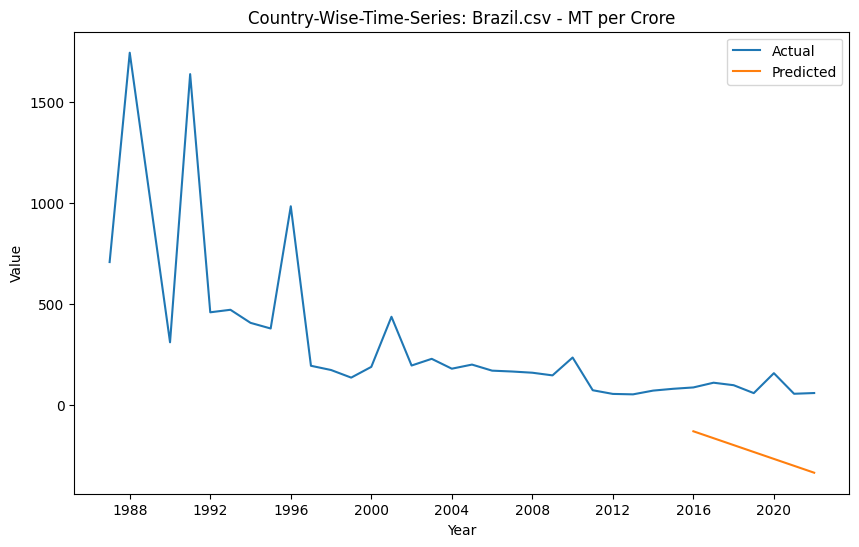

Country-Wise-Time-Series: Brazil.csv - MT per Crore RMSE: 328.8050070286594


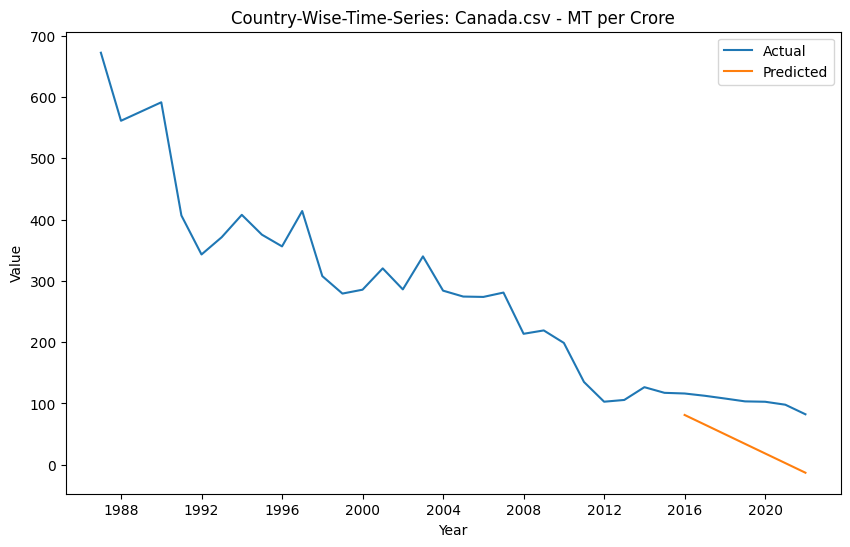

Country-Wise-Time-Series: Canada.csv - MT per Crore RMSE: 72.65904179807693


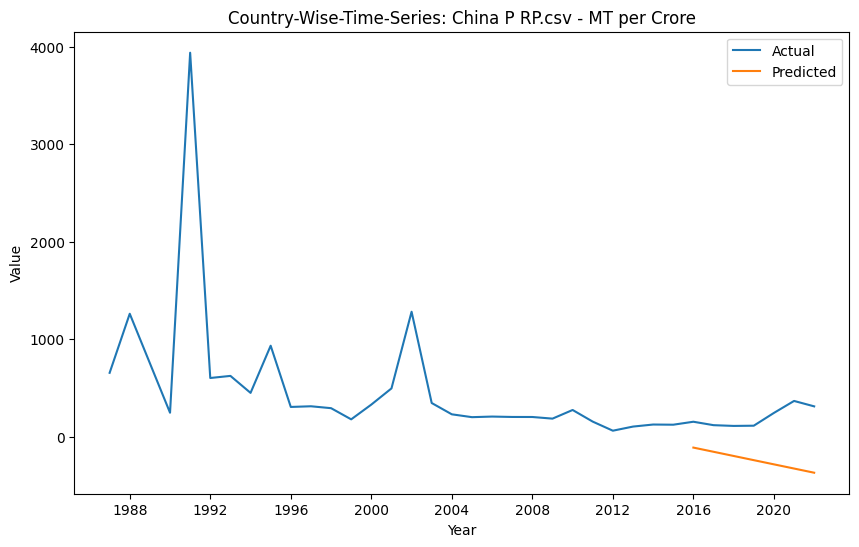

Country-Wise-Time-Series: China P RP.csv - MT per Crore RMSE: 475.65598080968306


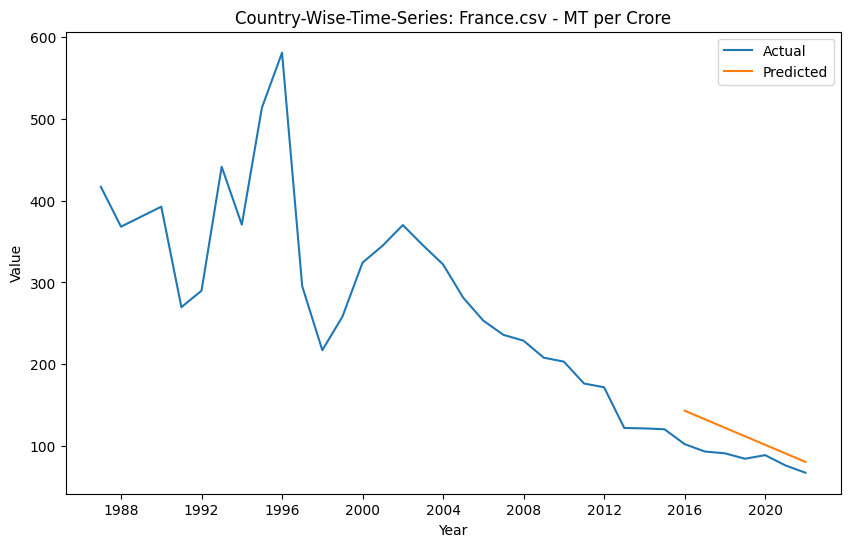

Country-Wise-Time-Series: France.csv - MT per Crore RMSE: 28.003863911141526


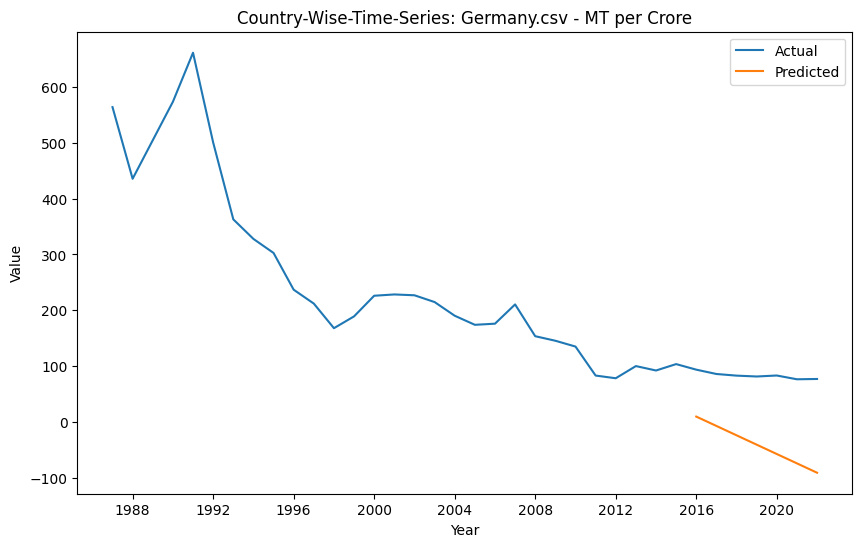

Country-Wise-Time-Series: Germany.csv - MT per Crore RMSE: 126.7497205758987


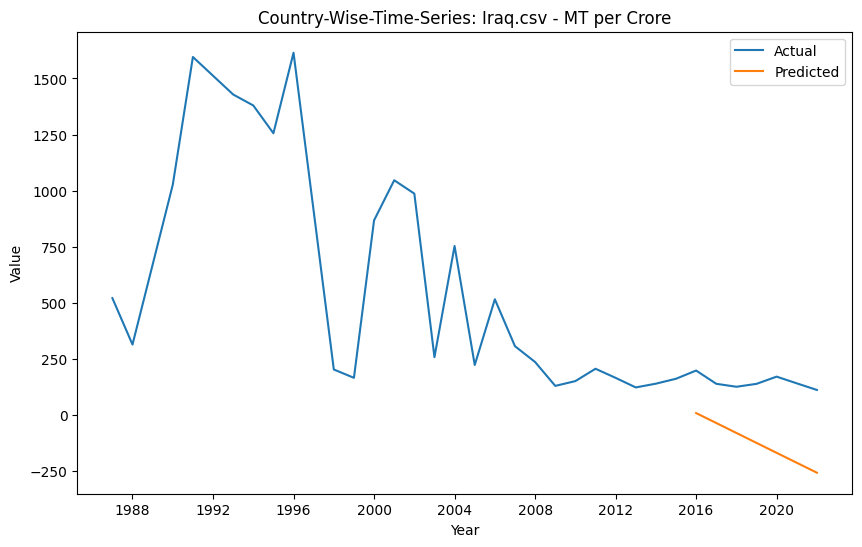

Country-Wise-Time-Series: Iraq.csv - MT per Crore RMSE: 281.7103031033937


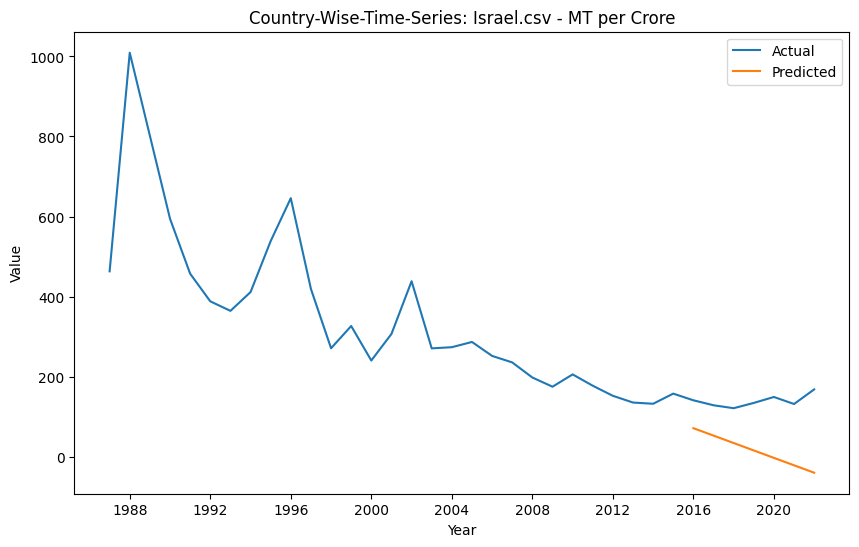

Country-Wise-Time-Series: Israel.csv - MT per Crore RMSE: 132.12181022805154


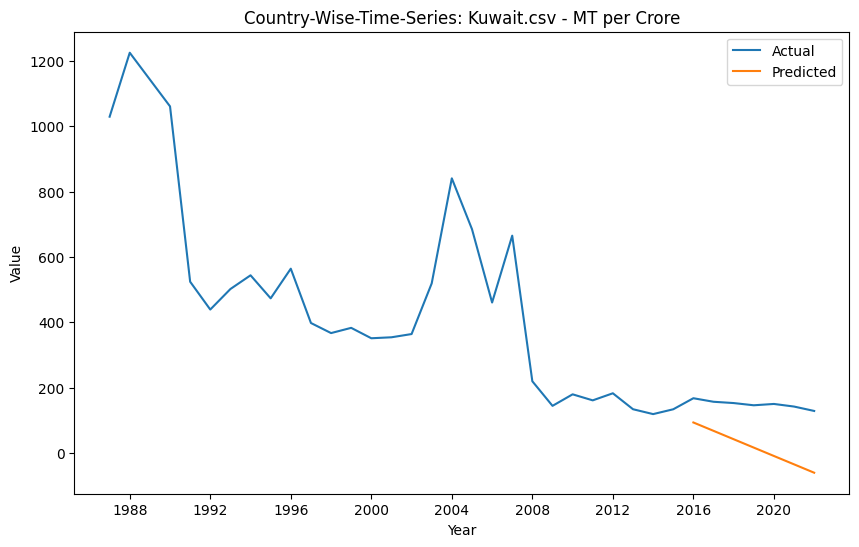

Country-Wise-Time-Series: Kuwait.csv - MT per Crore RMSE: 138.8342741215542


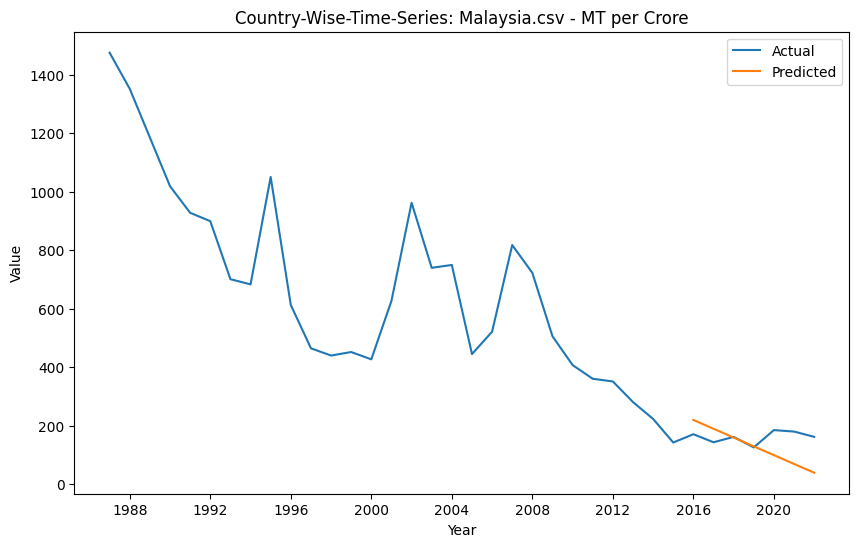

Country-Wise-Time-Series: Malaysia.csv - MT per Crore RMSE: 74.75835586925146


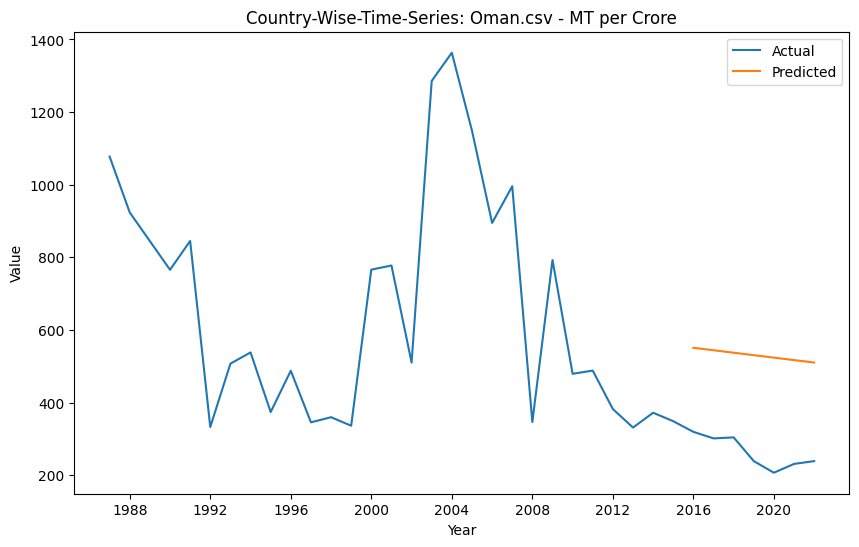

Country-Wise-Time-Series: Oman.csv - MT per Crore RMSE: 269.32252015430515


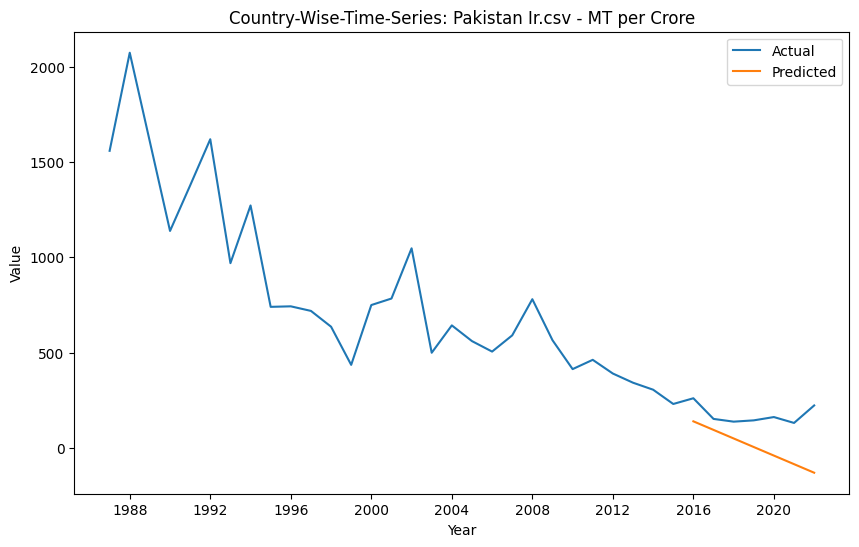

Country-Wise-Time-Series: Pakistan Ir.csv - MT per Crore RMSE: 191.7586463014045


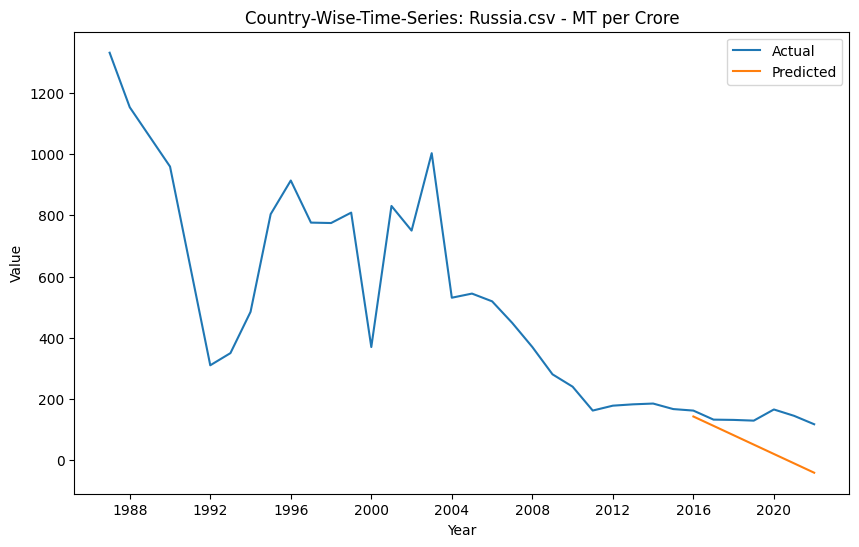

Country-Wise-Time-Series: Russia.csv - MT per Crore RMSE: 106.75417115992596


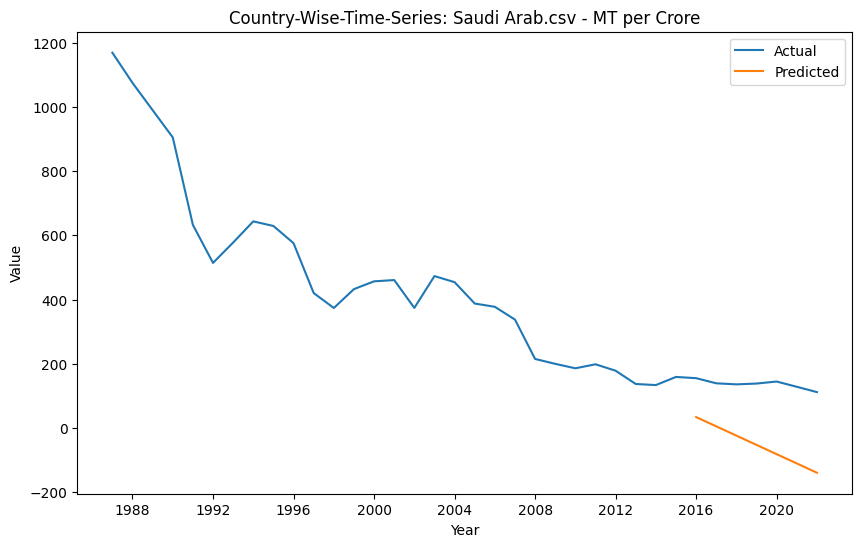

Country-Wise-Time-Series: Saudi Arab.csv - MT per Crore RMSE: 194.76277816230743


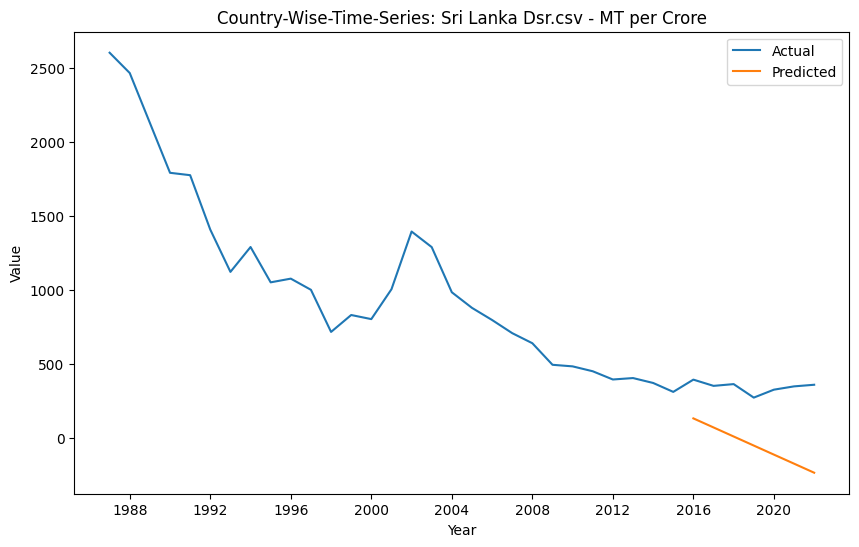

Country-Wise-Time-Series: Sri Lanka Dsr.csv - MT per Crore RMSE: 412.97465556003783


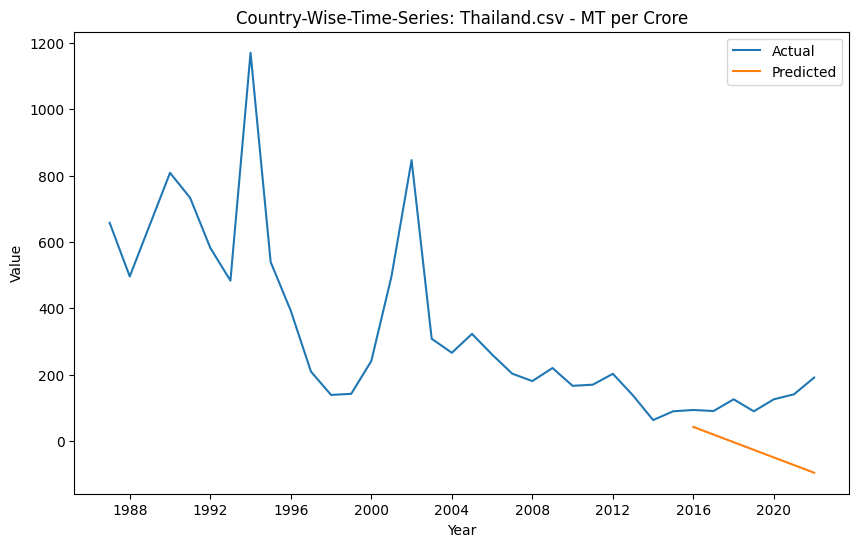

Country-Wise-Time-Series: Thailand.csv - MT per Crore RMSE: 167.33961910417221


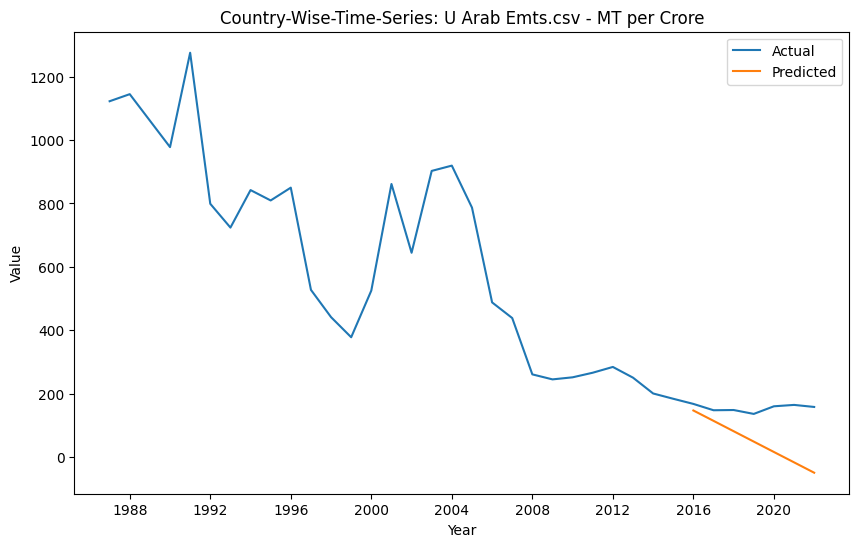

Country-Wise-Time-Series: U Arab Emts.csv - MT per Crore RMSE: 125.49384019548985


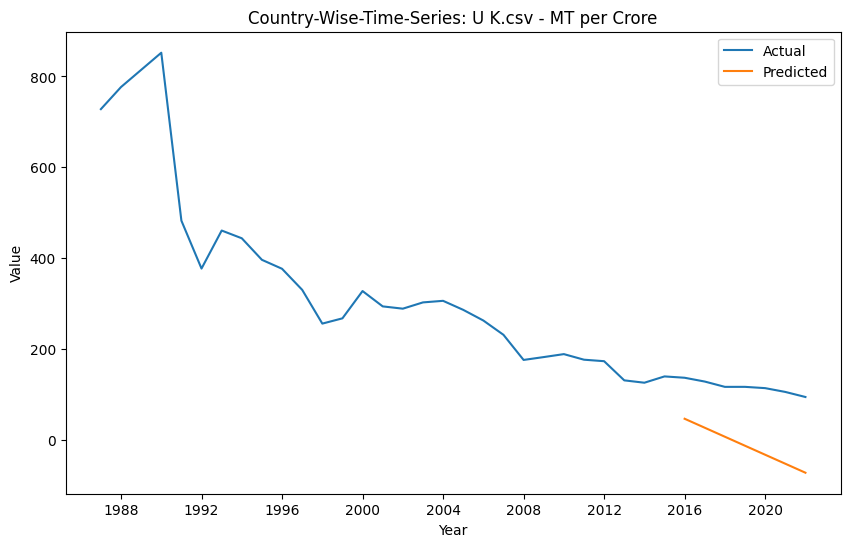

Country-Wise-Time-Series: U K.csv - MT per Crore RMSE: 131.80077020806385


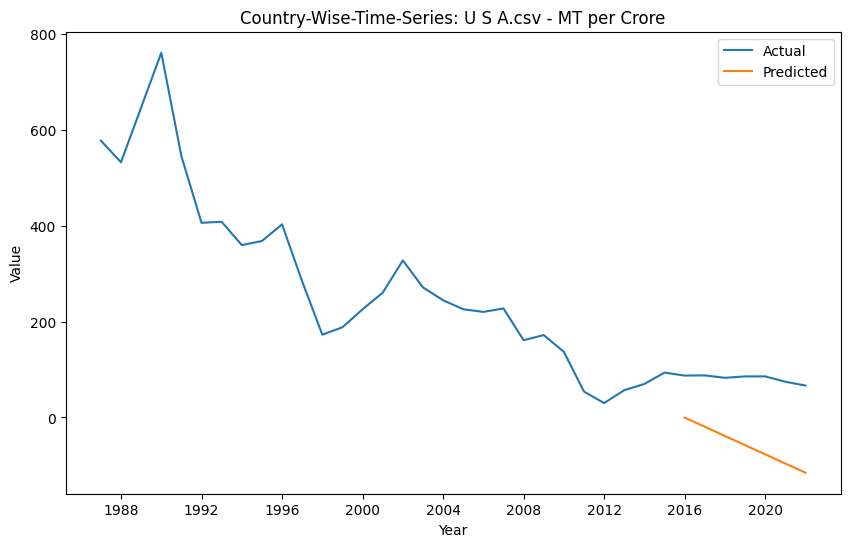

Country-Wise-Time-Series: U S A.csv - MT per Crore RMSE: 143.0182935763414


In [6]:
# Export Prediction Country Wise

folders_to_process = ['Country-Wise-Time-Series']

for folder_name in folders_to_process:
    folder_path = os.path.join(base_dir, folder_name)
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_name}' does not exist.")
        continue
    
    print(f"Processing data in folder: {folder_name}...")
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        if 'Year' in df.columns:
            if df['Year'].iloc[-1] == 'Total':
                df = df.iloc[:-1]
                df = df.iloc[:-1]
            # Handle cases where 'Year' column contains more than just the year
            df['Year'] = df['Year'].str.extract('(\d{4})', expand=False)
            df['Year'] = pd.to_datetime(df['Year'], format='%Y')
            df.set_index('Year', inplace=True)
        df = df[df["MT per Crore"] != 0]
        
        for column in df.columns:
            if column not in ['Year', '% Share(Qty)', '% Share(Rs)', 'Qty(MT)', 'Rs(Crore)']:
                predictions, rmse = fit_linear_regression(df[column])
                if predictions is not None:
                    plot_forecast(df[column], predictions, f"{folder_name}: {file_name} - {column}")
                    print(f"{folder_name}: {file_name} - {column} RMSE: {rmse}")
                else:
                    print(f"{folder_name}: {file_name} - {column} not enough data for Linear Regression model")


Processing data in folder: Product-Wise-Time-Series...


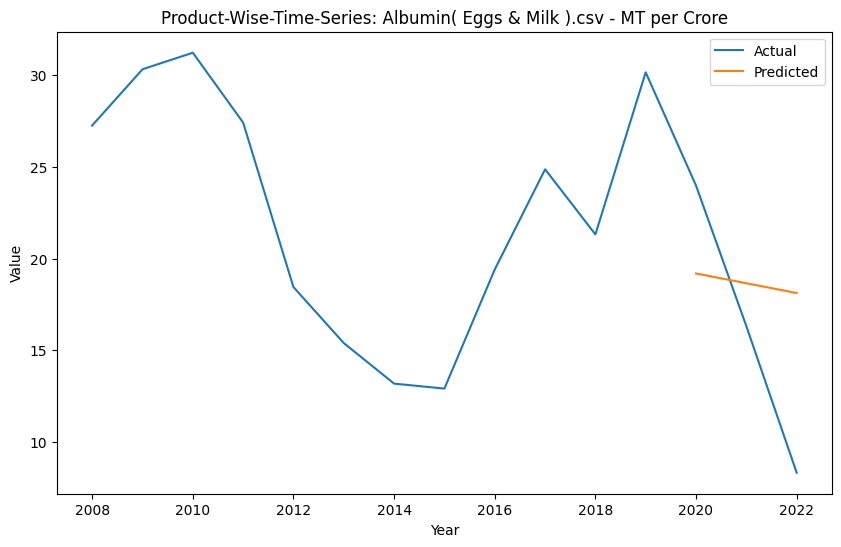

Product-Wise-Time-Series: Albumin( Eggs & Milk ).csv - MT per Crore RMSE: 6.445907699695568
Test series must contain at least 2 values.
Product-Wise-Time-Series: Albumin( Eggs & Milk).csv - MT per Crore not enough data for Linear Regression model


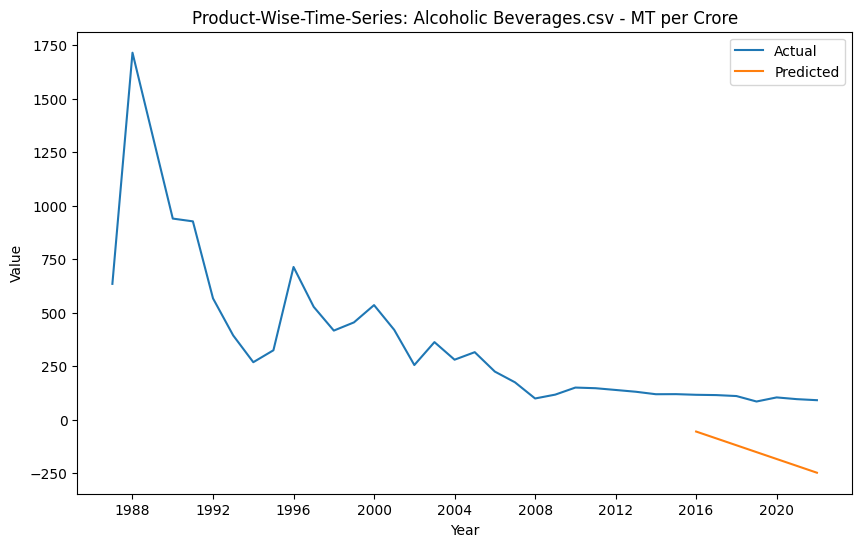

Product-Wise-Time-Series: Alcoholic Beverages.csv - MT per Crore RMSE: 260.4555092236655


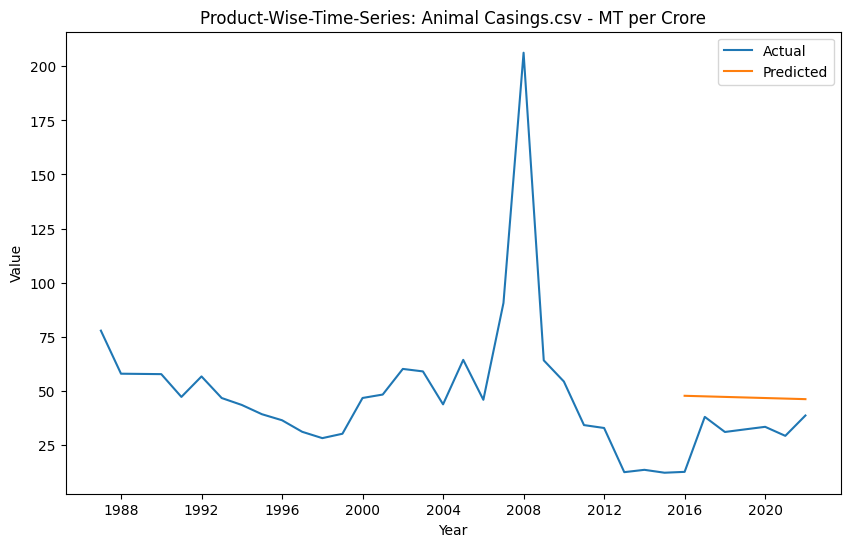

Product-Wise-Time-Series: Animal Casings.csv - MT per Crore RMSE: 18.276161958090857


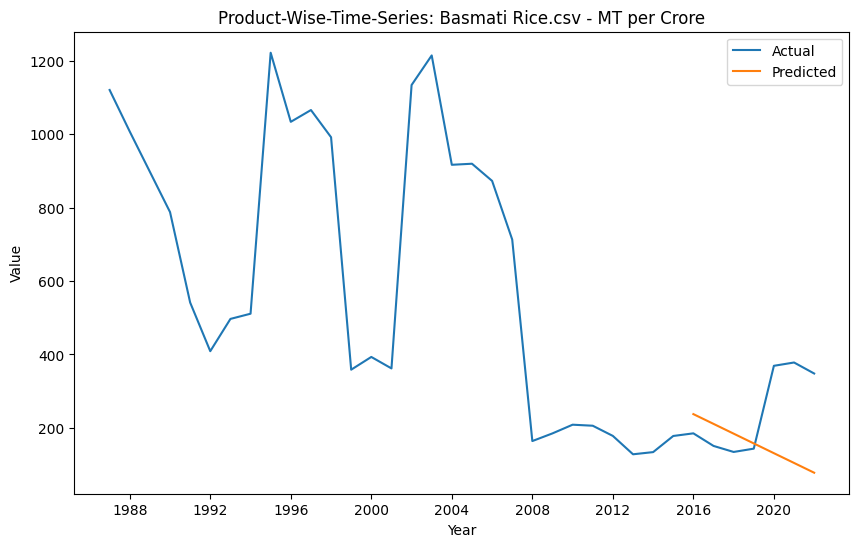

Product-Wise-Time-Series: Basmati Rice.csv - MT per Crore RMSE: 174.58971010782935


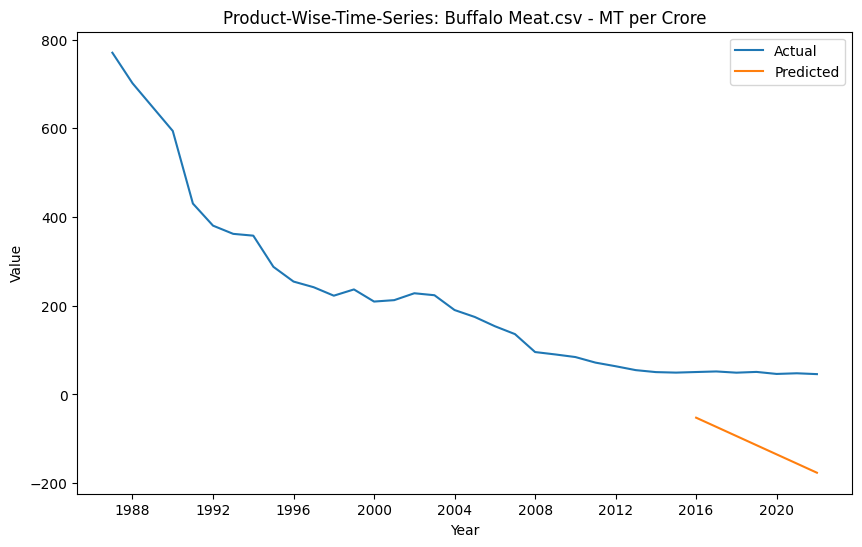

Product-Wise-Time-Series: Buffalo Meat.csv - MT per Crore RMSE: 168.03603691320637


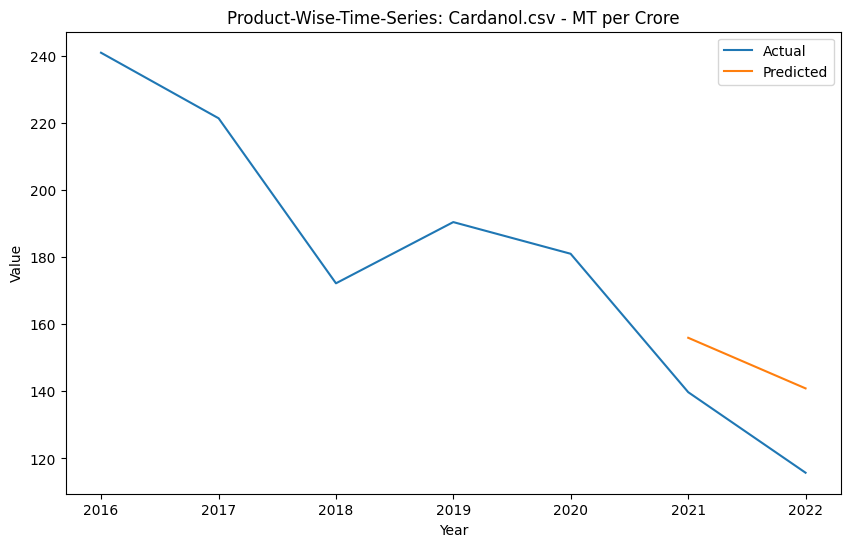

Product-Wise-Time-Series: Cardanol.csv - MT per Crore RMSE: 21.13588338584404


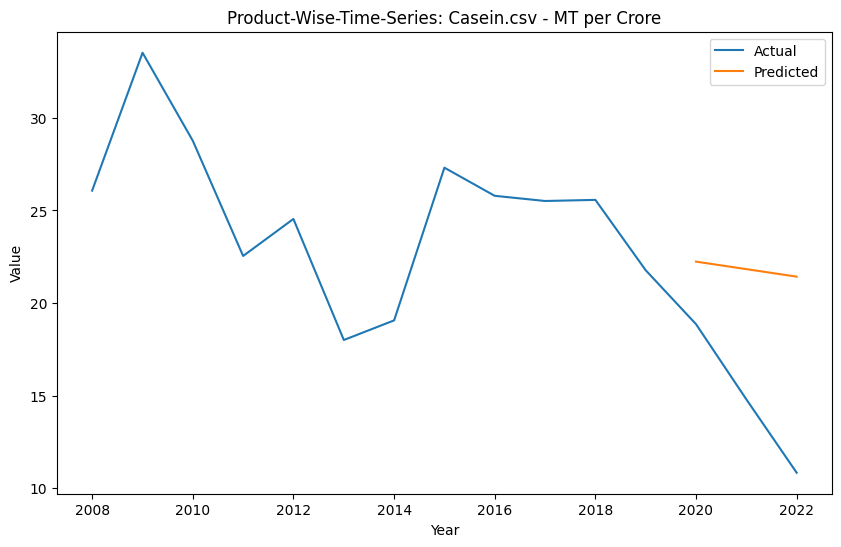

Product-Wise-Time-Series: Casein.csv - MT per Crore RMSE: 7.596895085655617


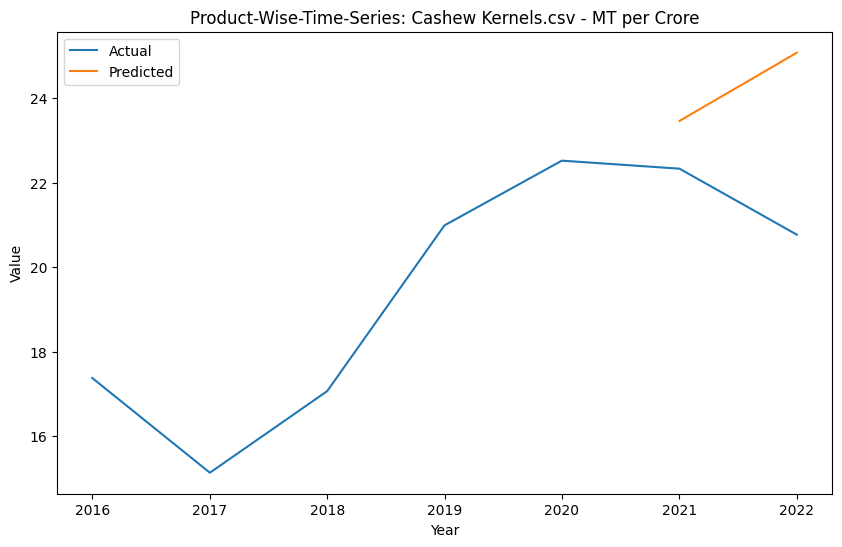

Product-Wise-Time-Series: Cashew Kernels.csv - MT per Crore RMSE: 3.1449837042503095


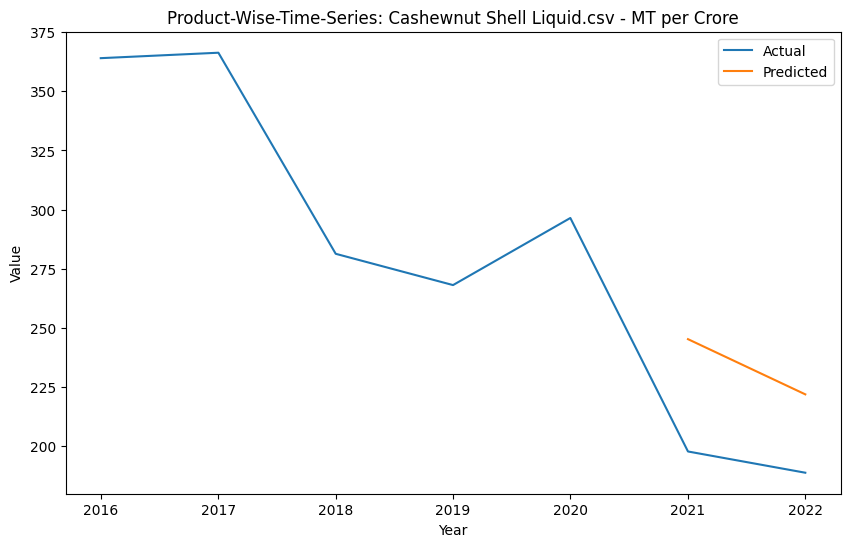

Product-Wise-Time-Series: Cashewnut Shell Liquid.csv - MT per Crore RMSE: 40.95094324310492


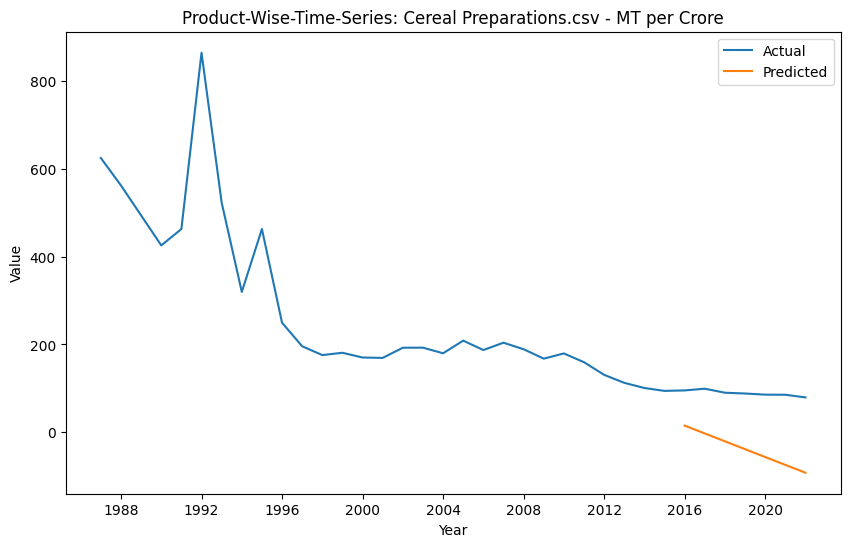

Product-Wise-Time-Series: Cereal Preparations.csv - MT per Crore RMSE: 131.00243463476104


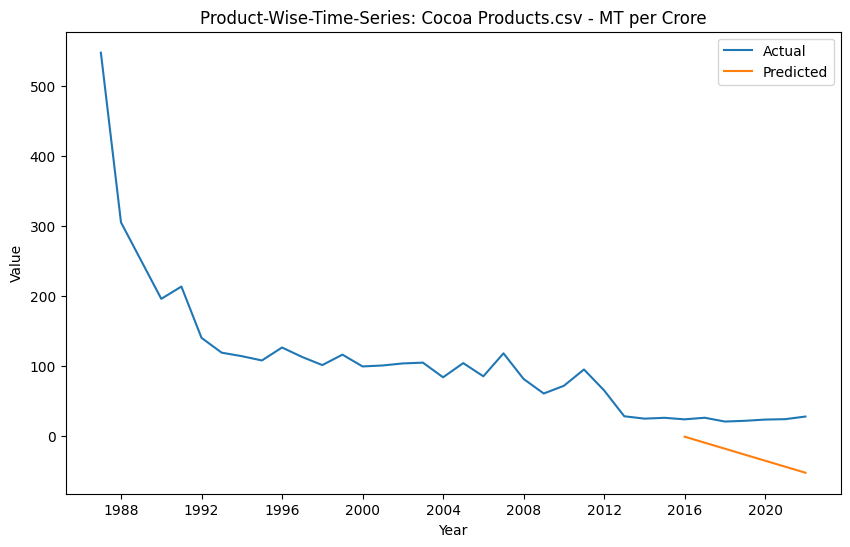

Product-Wise-Time-Series: Cocoa Products.csv - MT per Crore RMSE: 53.76069130319672


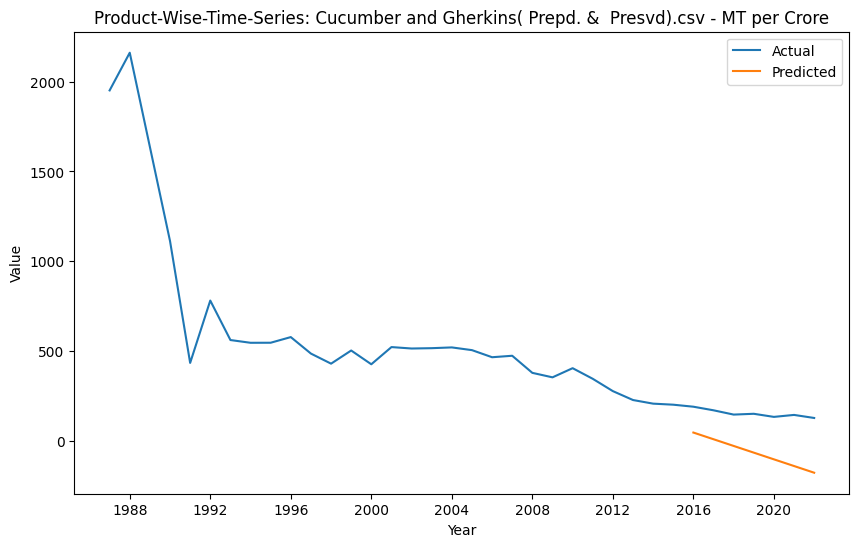

Product-Wise-Time-Series: Cucumber and Gherkins( Prepd. &  Presvd).csv - MT per Crore RMSE: 224.46128108113138


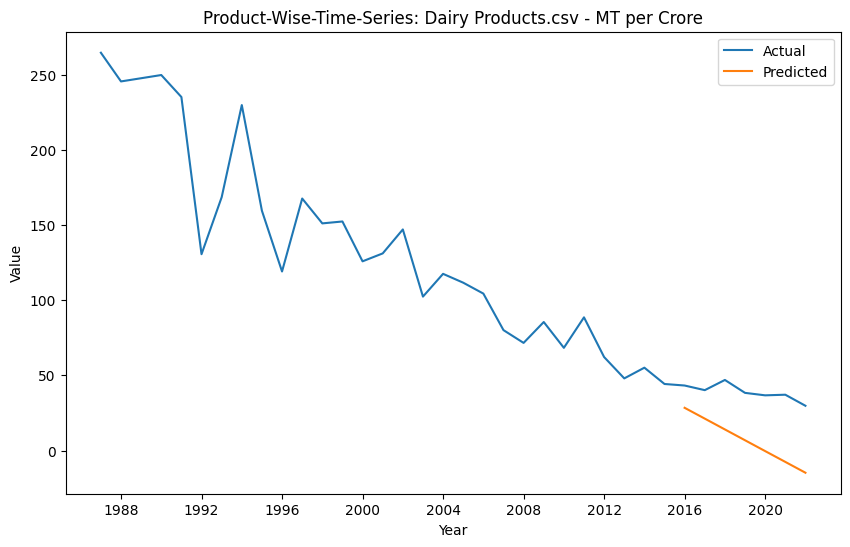

Product-Wise-Time-Series: Dairy Products.csv - MT per Crore RMSE: 33.841880540633895


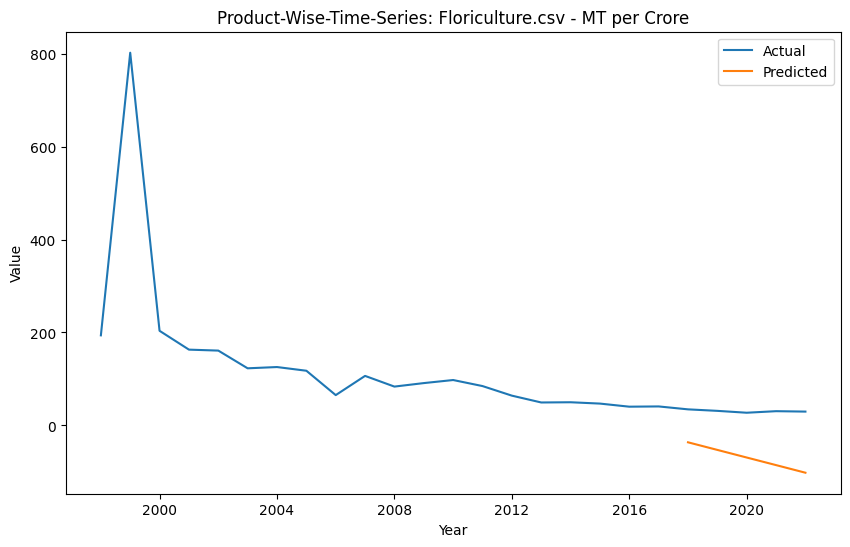

Product-Wise-Time-Series: Floriculture.csv - MT per Crore RMSE: 102.13424234594538


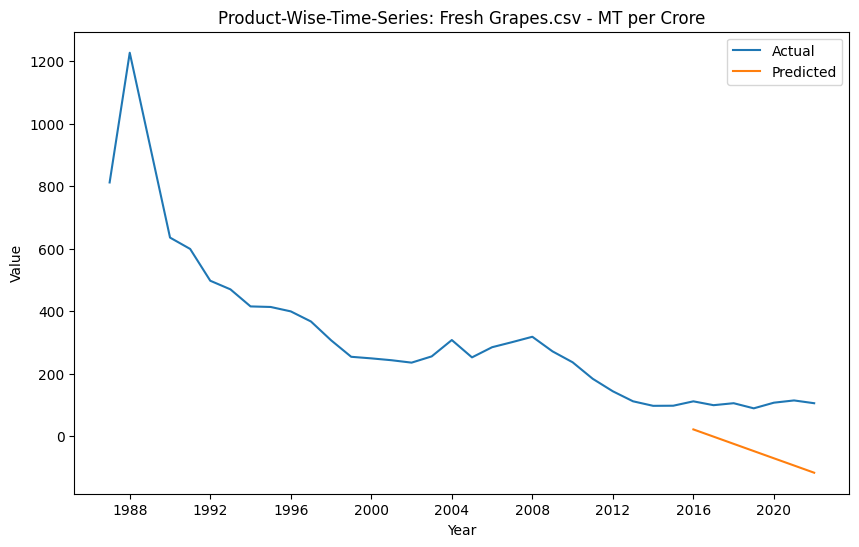

Product-Wise-Time-Series: Fresh Grapes.csv - MT per Crore RMSE: 159.6508776068309


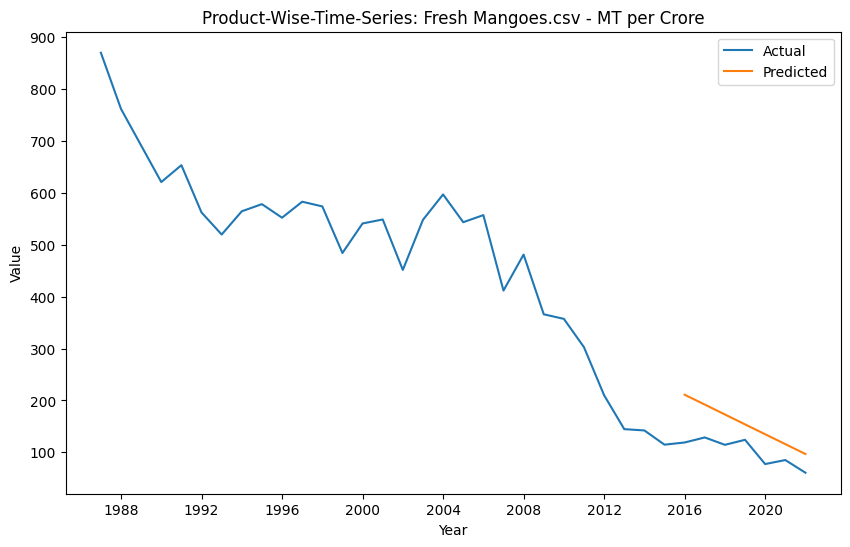

Product-Wise-Time-Series: Fresh Mangoes.csv - MT per Crore RMSE: 56.48621125667215


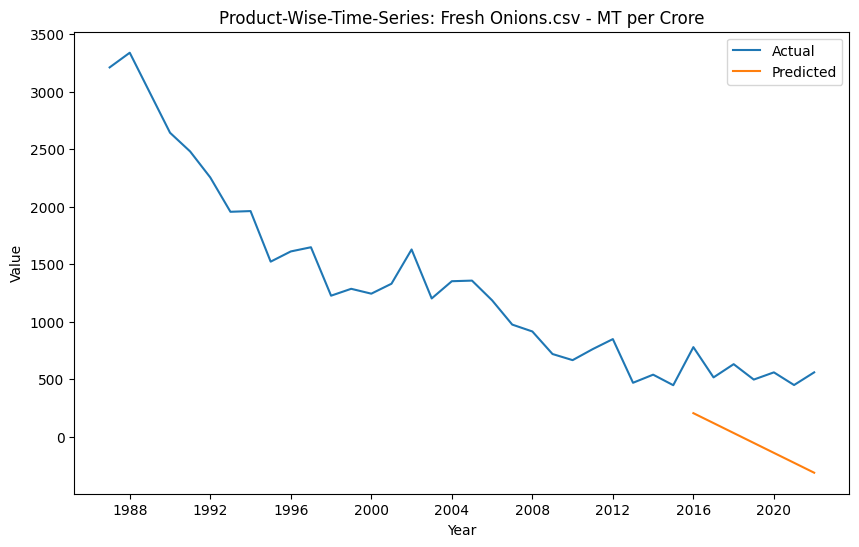

Product-Wise-Time-Series: Fresh Onions.csv - MT per Crore RMSE: 639.2682984322461


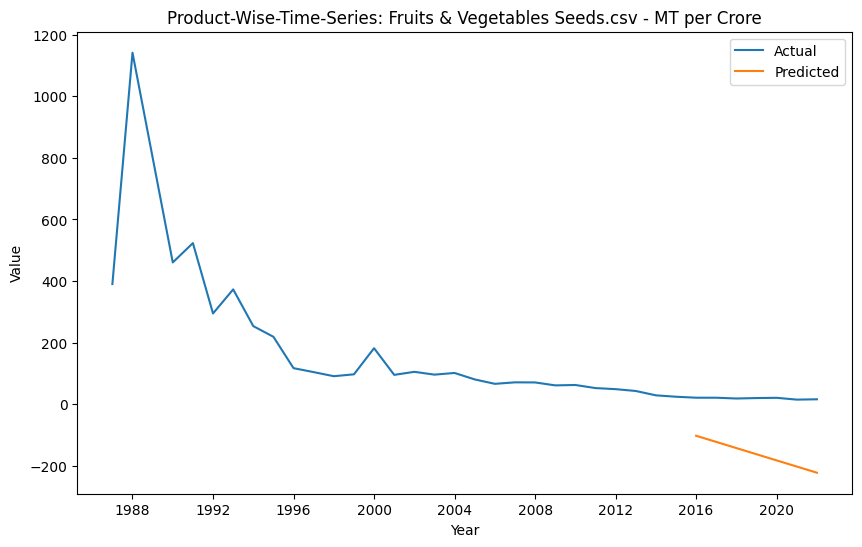

Product-Wise-Time-Series: Fruits & Vegetables Seeds.csv - MT per Crore RMSE: 185.2069389815122


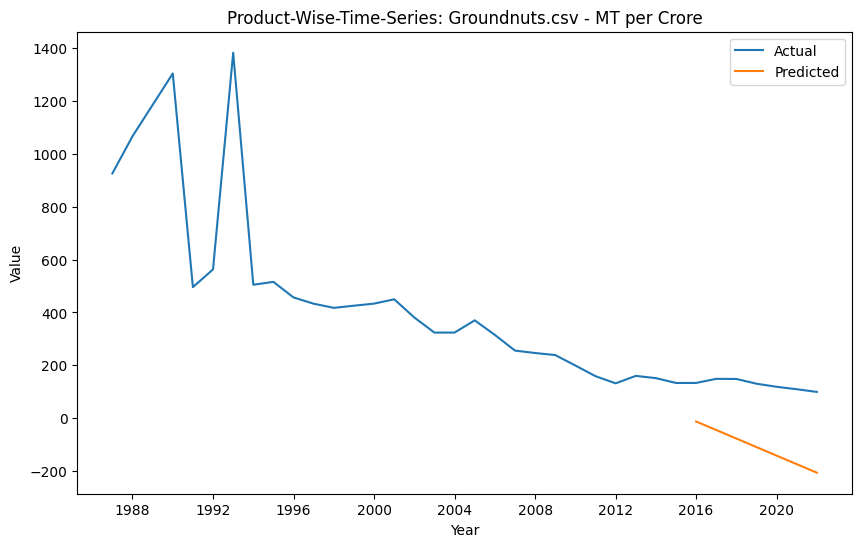

Product-Wise-Time-Series: Groundnuts.csv - MT per Crore RMSE: 241.51495166843407


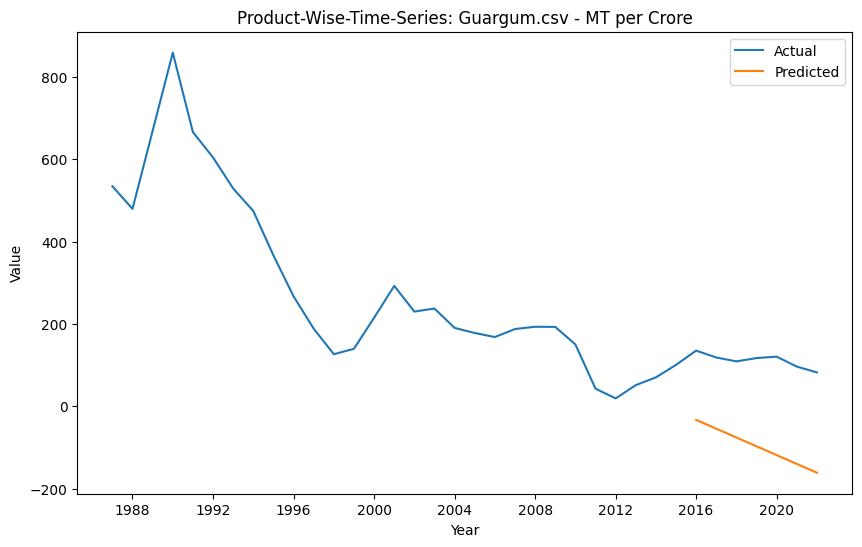

Product-Wise-Time-Series: Guargum.csv - MT per Crore RMSE: 210.74398875208925


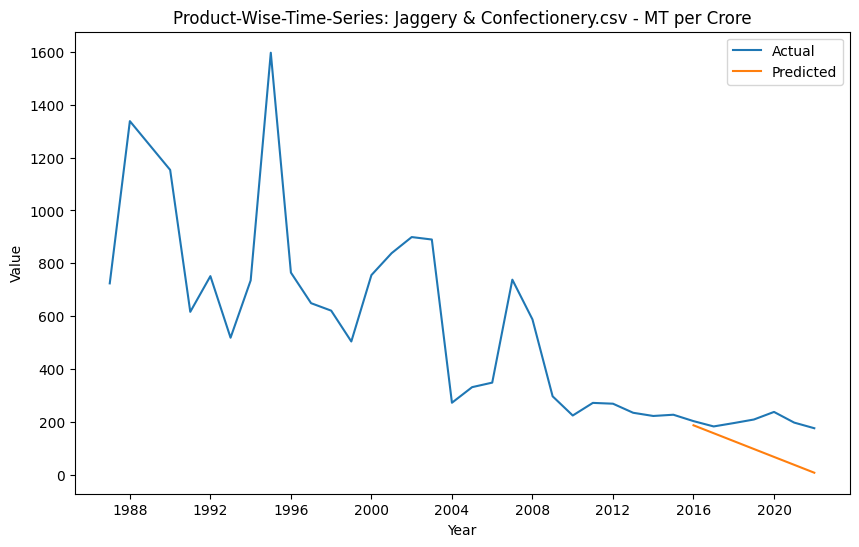

Product-Wise-Time-Series: Jaggery & Confectionery.csv - MT per Crore RMSE: 120.04881983982057


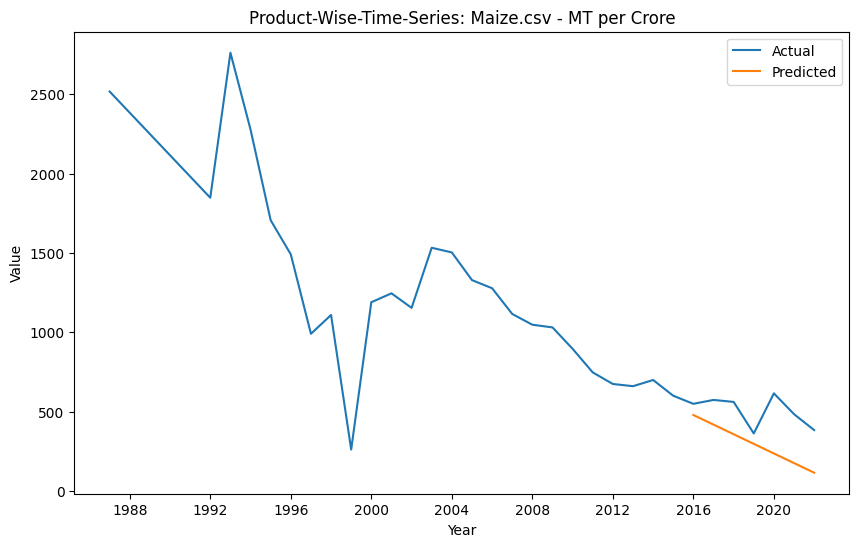

Product-Wise-Time-Series: Maize.csv - MT per Crore RMSE: 234.64893850607749


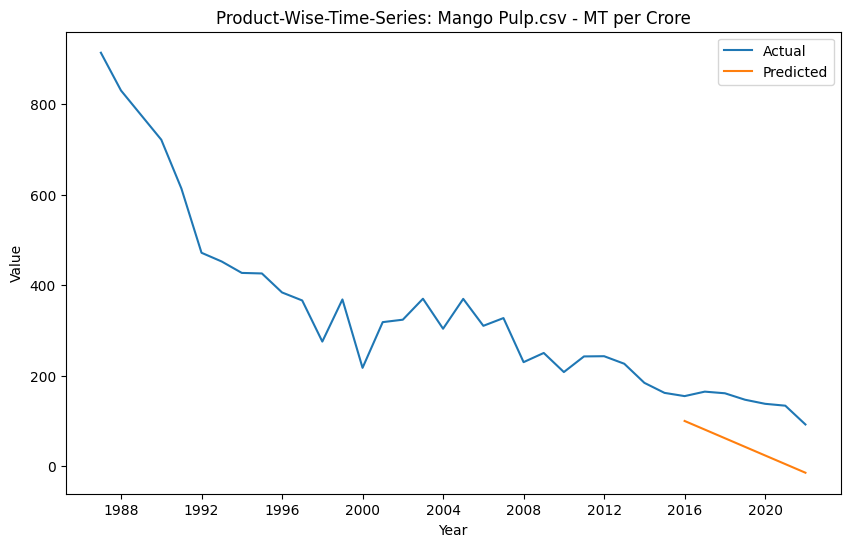

Product-Wise-Time-Series: Mango Pulp.csv - MT per Crore RMSE: 101.30254042567245


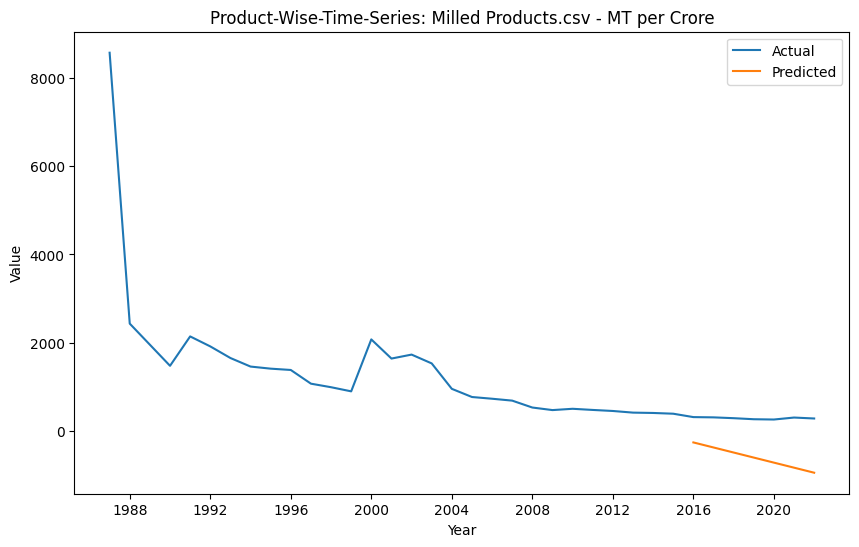

Product-Wise-Time-Series: Milled Products.csv - MT per Crore RMSE: 919.0029717566575


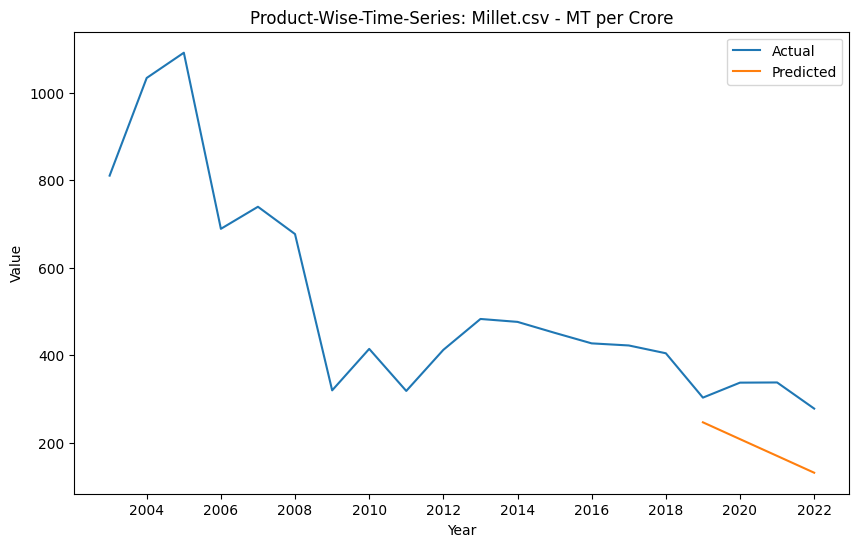

Product-Wise-Time-Series: Millet.csv - MT per Crore RMSE: 131.83130883744354


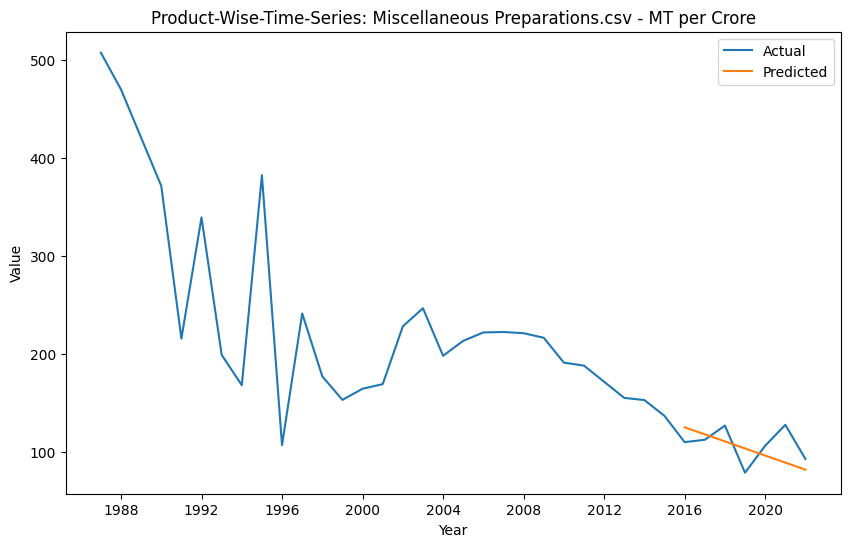

Product-Wise-Time-Series: Miscellaneous Preparations.csv - MT per Crore RMSE: 20.104597799120445


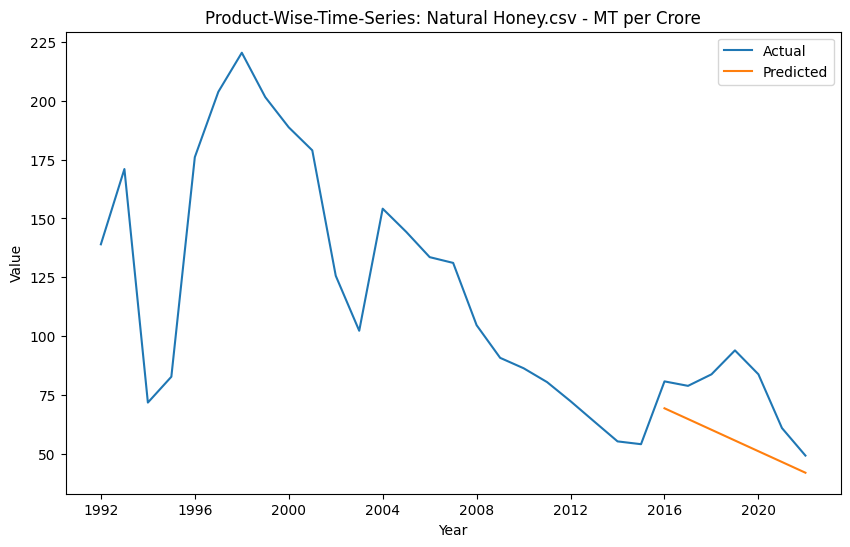

Product-Wise-Time-Series: Natural Honey.csv - MT per Crore RMSE: 22.92560484547276


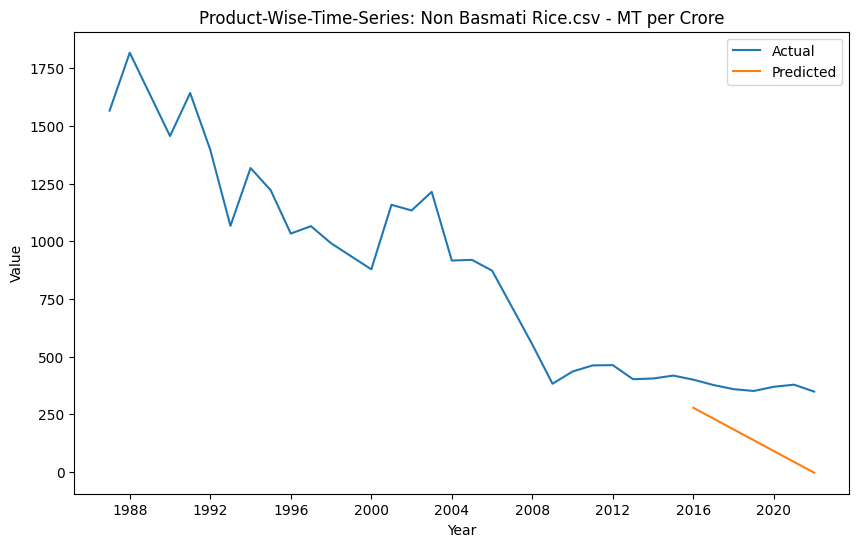

Product-Wise-Time-Series: Non Basmati Rice.csv - MT per Crore RMSE: 246.5756980358478


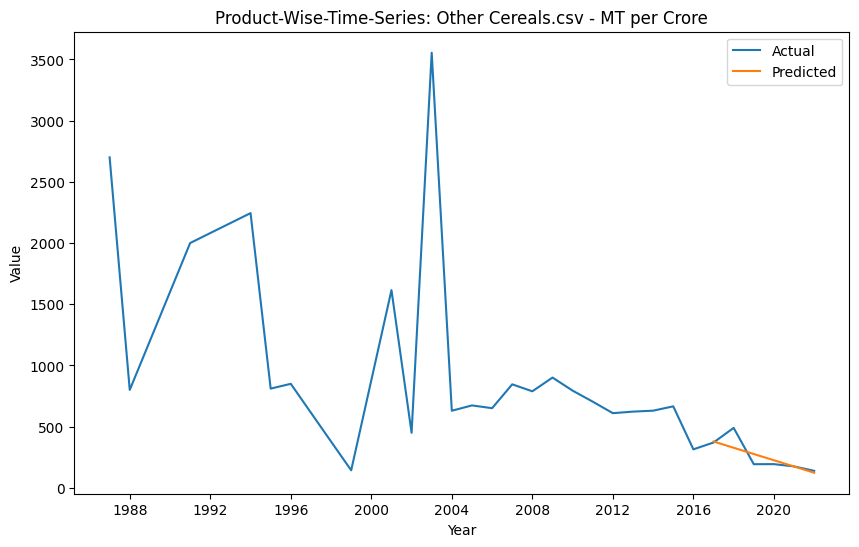

Product-Wise-Time-Series: Other Cereals.csv - MT per Crore RMSE: 75.97958703830342


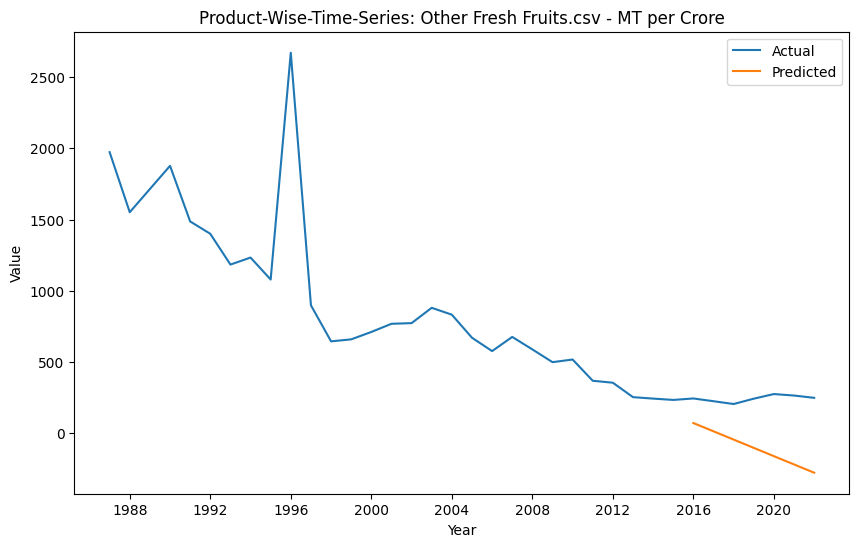

Product-Wise-Time-Series: Other Fresh Fruits.csv - MT per Crore RMSE: 370.17380441361126


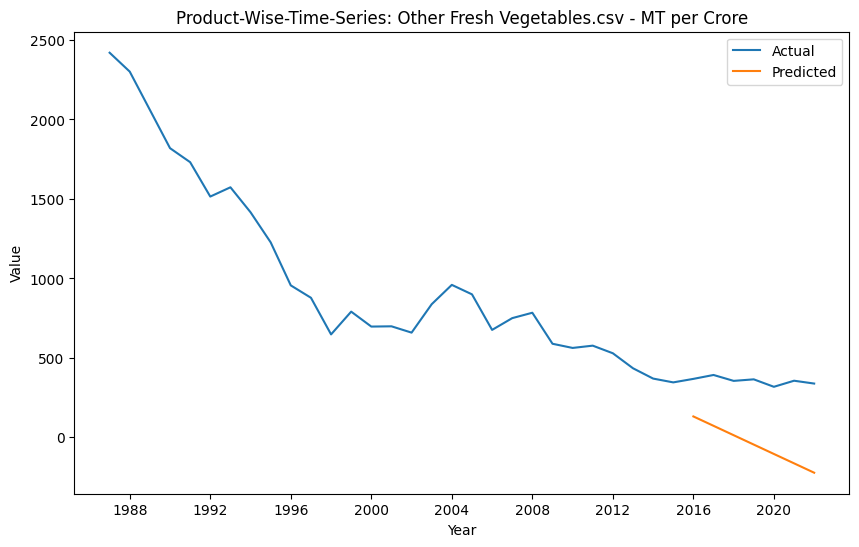

Product-Wise-Time-Series: Other Fresh Vegetables.csv - MT per Crore RMSE: 415.20807536499393


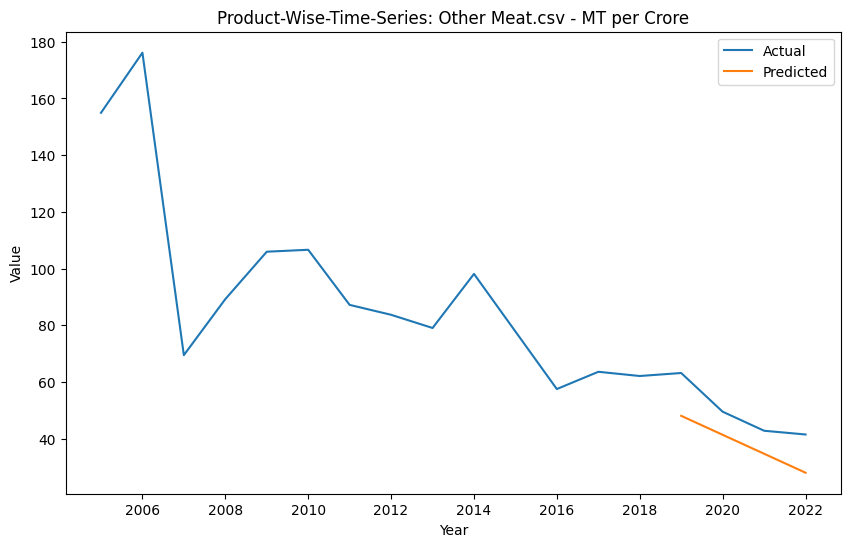

Product-Wise-Time-Series: Other Meat.csv - MT per Crore RMSE: 11.644003087582655
Test series must contain at least 2 values.
Product-Wise-Time-Series: Other Oil Cake or Solid Resdus.csv - MT per Crore not enough data for Linear Regression model


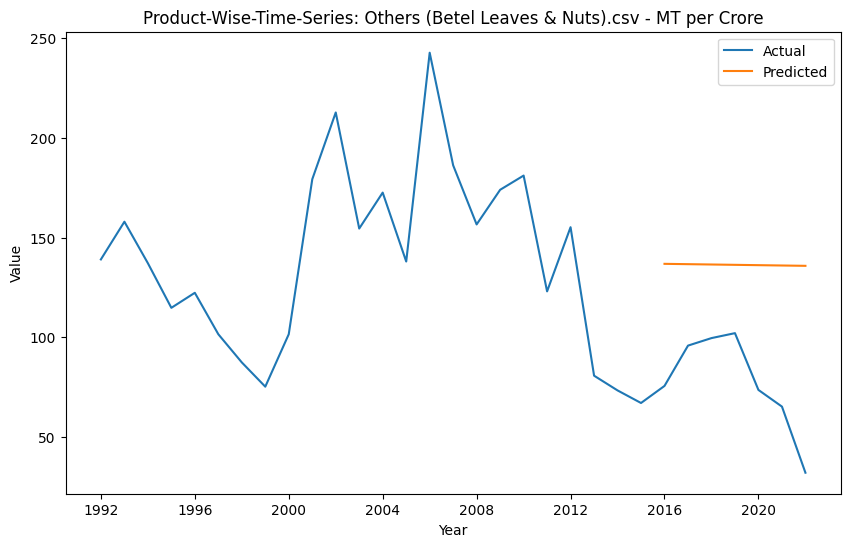

Product-Wise-Time-Series: Others (Betel Leaves & Nuts).csv - MT per Crore RMSE: 62.78708315616717


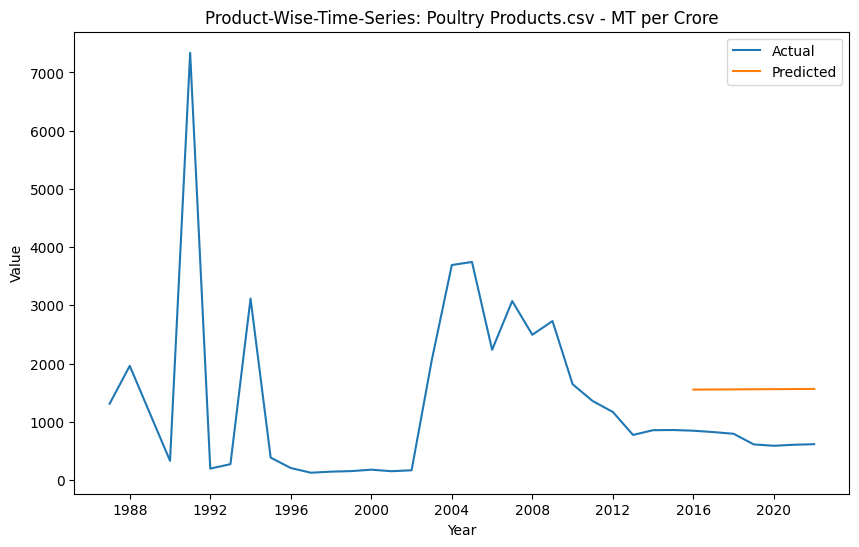

Product-Wise-Time-Series: Poultry Products.csv - MT per Crore RMSE: 868.2517001045306
Test series must contain at least 2 values.
Product-Wise-Time-Series: Prepared Animal Feeder.csv - MT per Crore not enough data for Linear Regression model


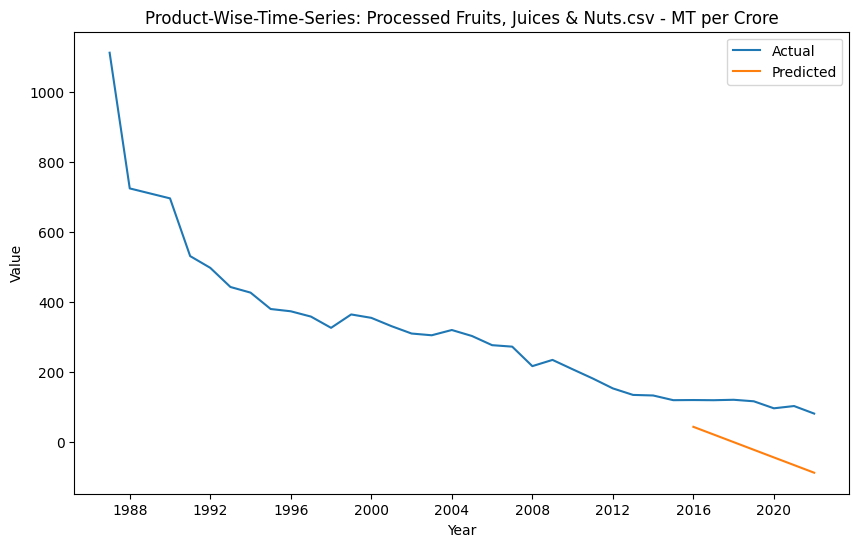

Product-Wise-Time-Series: Processed Fruits, Juices & Nuts.csv - MT per Crore RMSE: 134.03947229726288


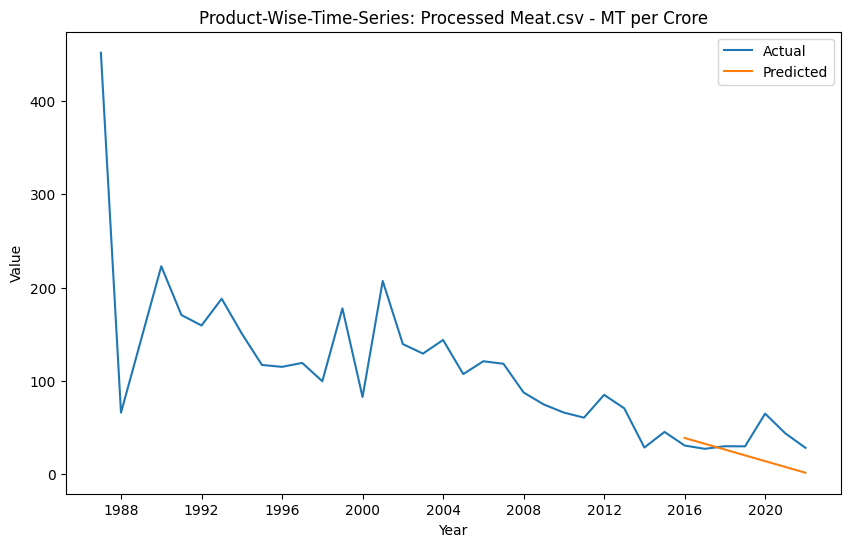

Product-Wise-Time-Series: Processed Meat.csv - MT per Crore RMSE: 26.18196368631785


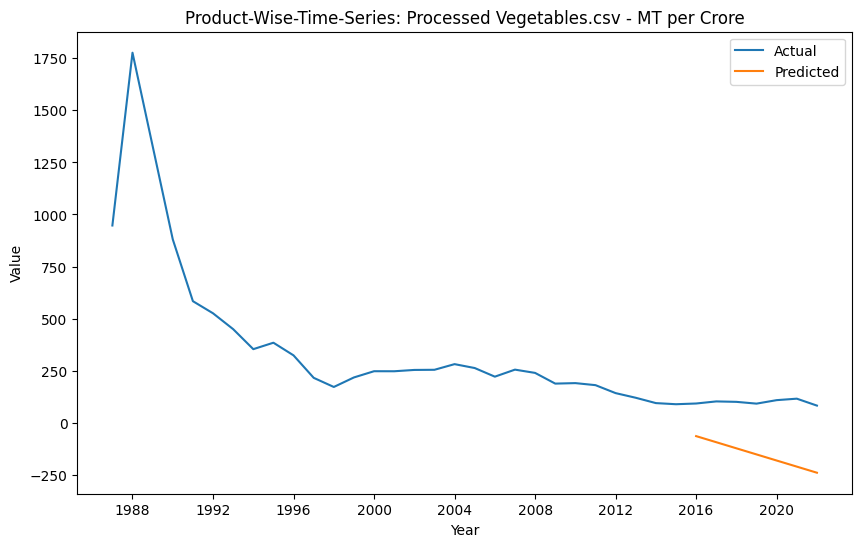

Product-Wise-Time-Series: Processed Vegetables.csv - MT per Crore RMSE: 258.15611347897857


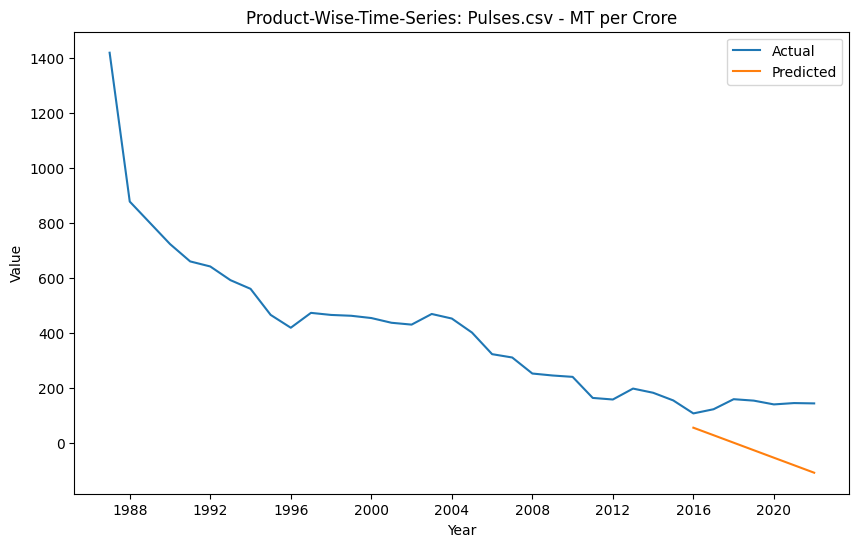

Product-Wise-Time-Series: Pulses.csv - MT per Crore RMSE: 178.06785740759136


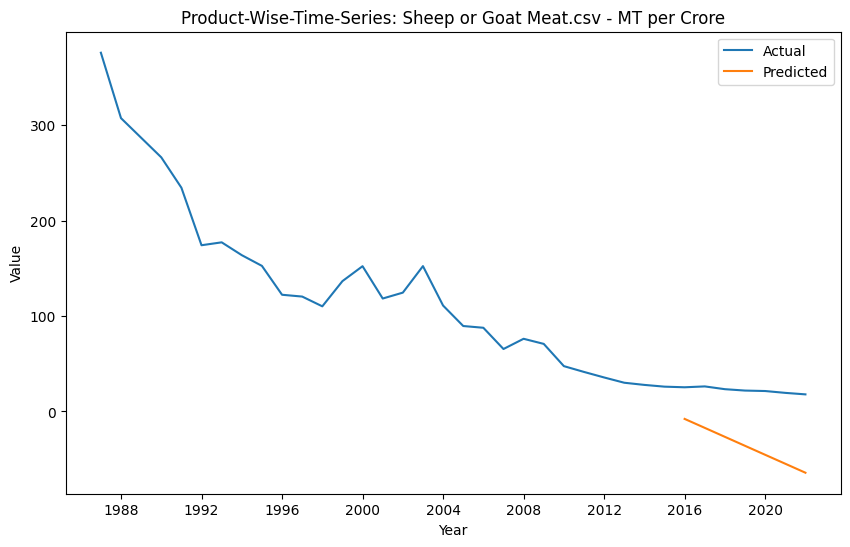

Product-Wise-Time-Series: Sheep or Goat Meat.csv - MT per Crore RMSE: 60.474738762512565


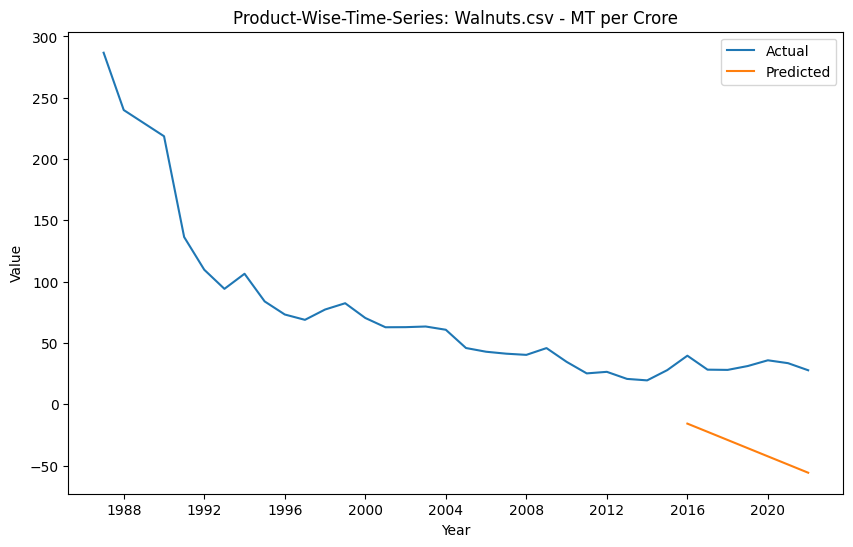

Product-Wise-Time-Series: Walnuts.csv - MT per Crore RMSE: 69.01496045684281


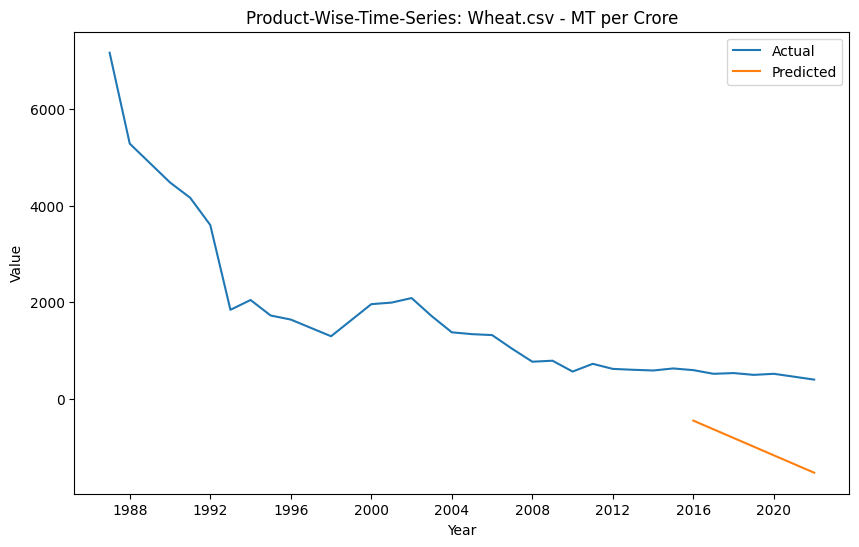

Product-Wise-Time-Series: Wheat.csv - MT per Crore RMSE: 1525.1021204682174


In [7]:
# Export Prediction Product Wise

folders_to_process = ['Product-Wise-Time-Series']

for folder_name in folders_to_process:
    folder_path = os.path.join(base_dir, folder_name)
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_name}' does not exist.")
        continue
    
    print(f"Processing data in folder: {folder_name}...")
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        if 'Year' in df.columns:
            if df['Year'].iloc[-1] == 'Total':
                df = df.iloc[:-1]
                df = df.iloc[:-1]
            # Handle cases where 'Year' column contains more than just the year
            df['Year'] = df['Year'].str.extract('(\d{4})', expand=False)
            df['Year'] = pd.to_datetime(df['Year'], format='%Y')
            df.set_index('Year', inplace=True)
        df = df[df["MT per Crore"] != 0]
        
        for column in df.columns:
            if column not in ['Year', '% Share(Qty)', '% Share(Rs)', 'Qty(MT)', 'Rs(Crore)']:
                predictions, rmse = fit_linear_regression(df[column])
                if predictions is not None:
                    plot_forecast(df[column], predictions, f"{folder_name}: {file_name} - {column}")
                    print(f"{folder_name}: {file_name} - {column} RMSE: {rmse}")
                else:
                    print(f"{folder_name}: {file_name} - {column} not enough data for Linear Regression model")


Processing data in folder: State-Wise-Time-Series...
Test series must contain at least 2 values.
State-Wise-Time-Series: Andaman & Nicobar Islands.csv - MT per Crore not enough data for Linear Regression model


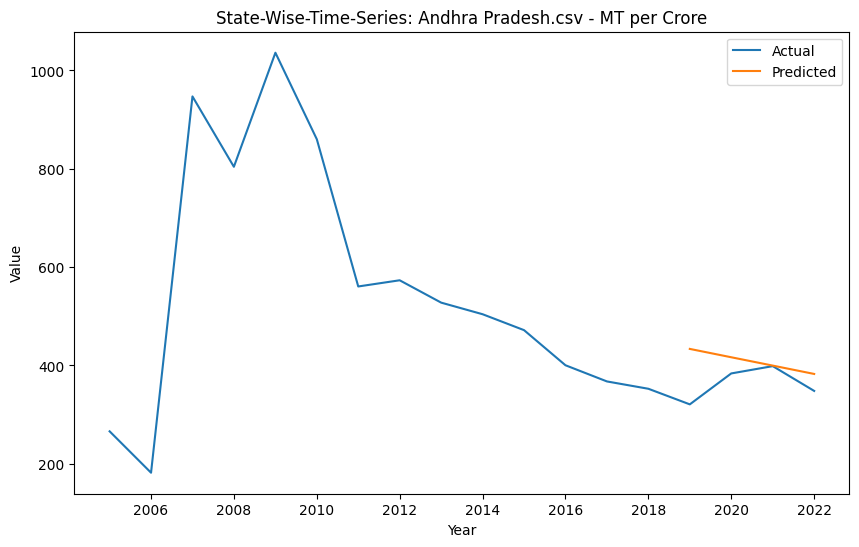

State-Wise-Time-Series: Andhra Pradesh.csv - MT per Crore RMSE: 61.227600725555284
Test series must contain at least 2 values.
State-Wise-Time-Series: Arunachal Pradesh.csv - MT per Crore not enough data for Linear Regression model


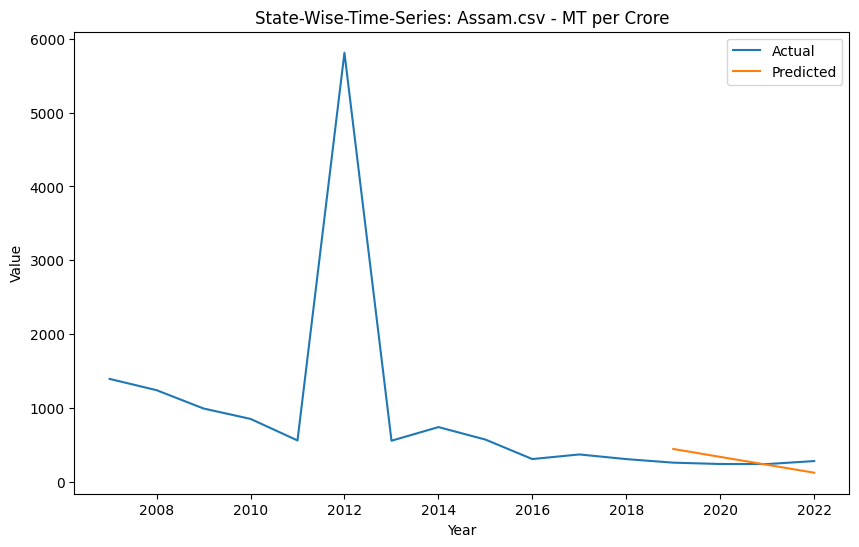

State-Wise-Time-Series: Assam.csv - MT per Crore RMSE: 131.18053936616926


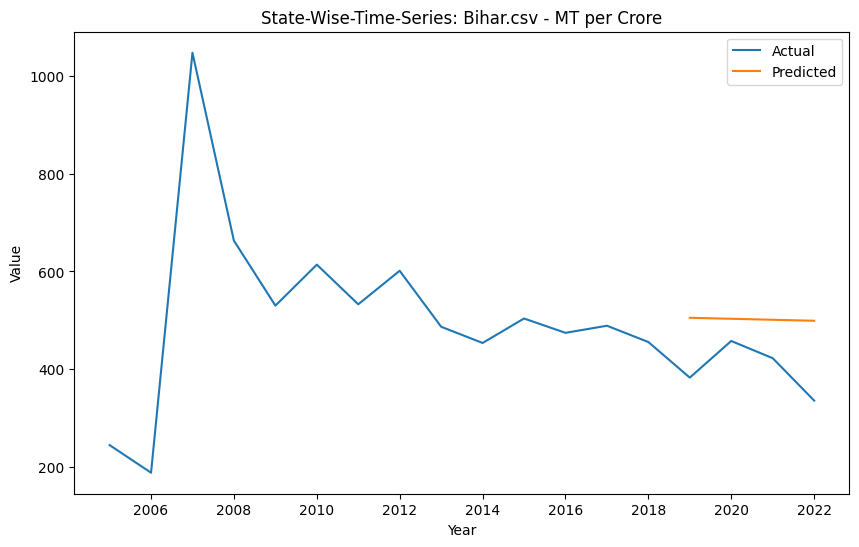

State-Wise-Time-Series: Bihar.csv - MT per Crore RMSE: 111.8331027818613


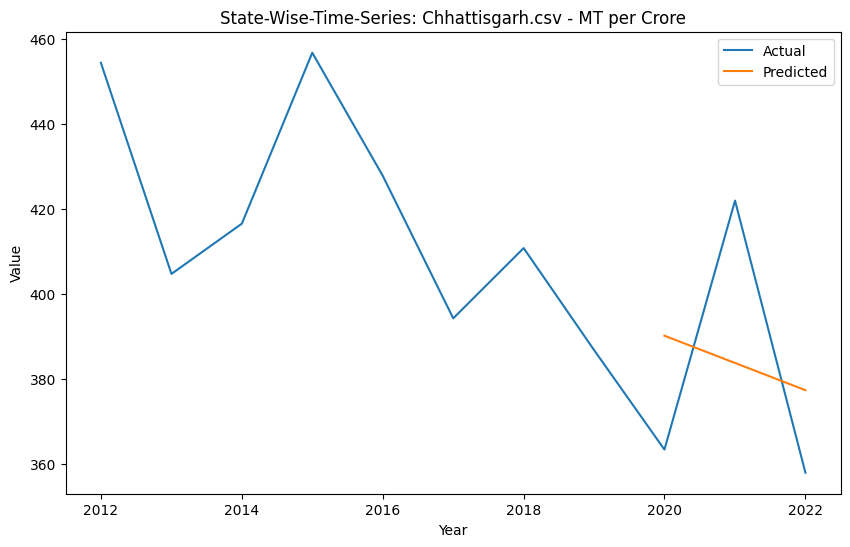

State-Wise-Time-Series: Chhattisgarh.csv - MT per Crore RMSE: 29.152086530935378
Test series must contain at least 2 values.
State-Wise-Time-Series: Daman & Diu.csv - MT per Crore not enough data for Linear Regression model


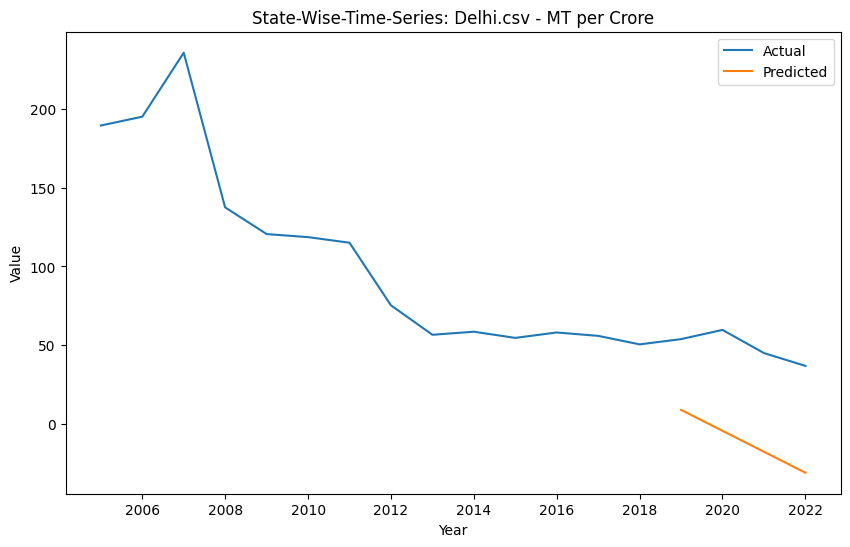

State-Wise-Time-Series: Delhi.csv - MT per Crore RMSE: 60.633566445466066


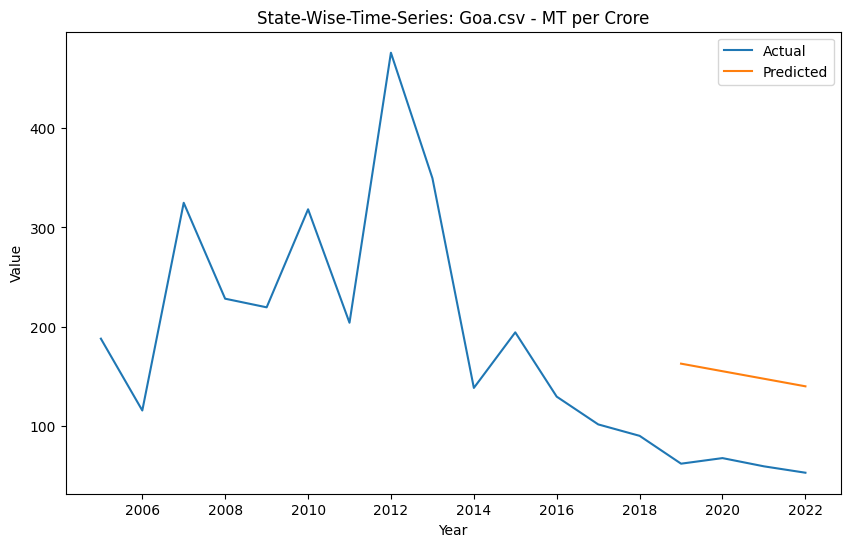

State-Wise-Time-Series: Goa.csv - MT per Crore RMSE: 91.00802126723194


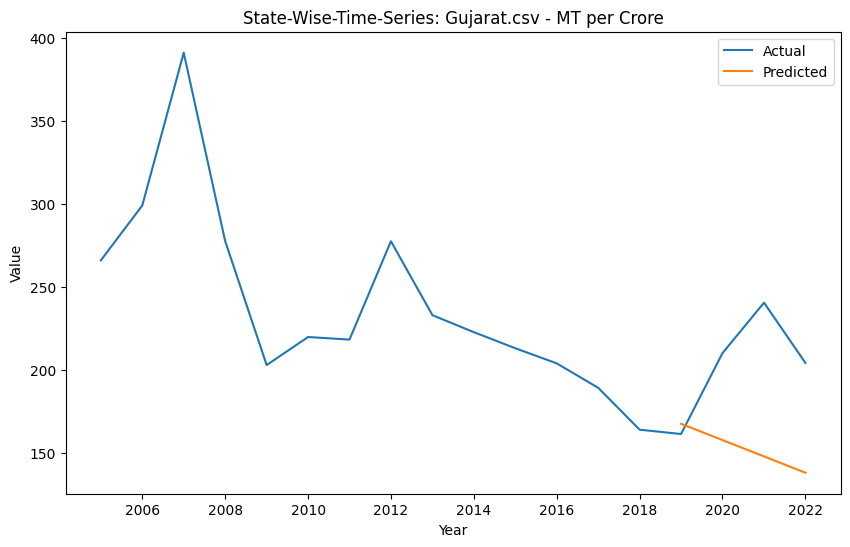

State-Wise-Time-Series: Gujarat.csv - MT per Crore RMSE: 62.60079923237843


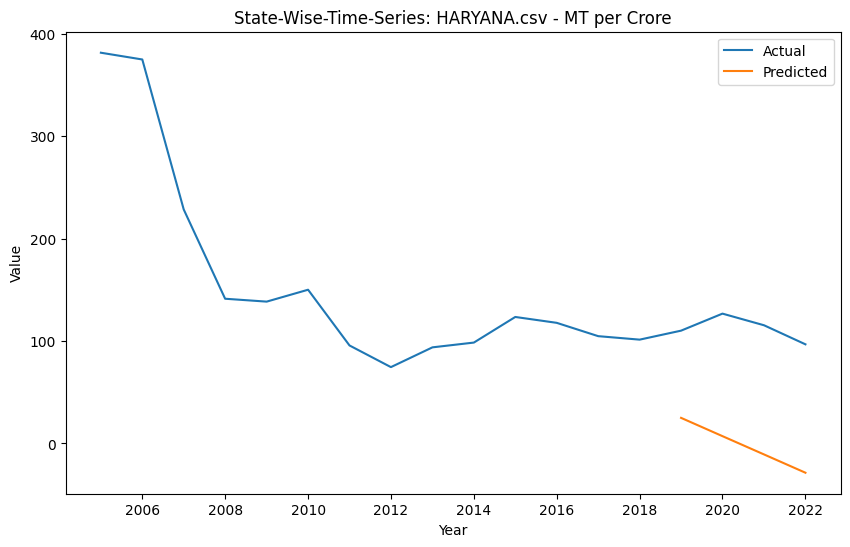

State-Wise-Time-Series: HARYANA.csv - MT per Crore RMSE: 115.32827088490973


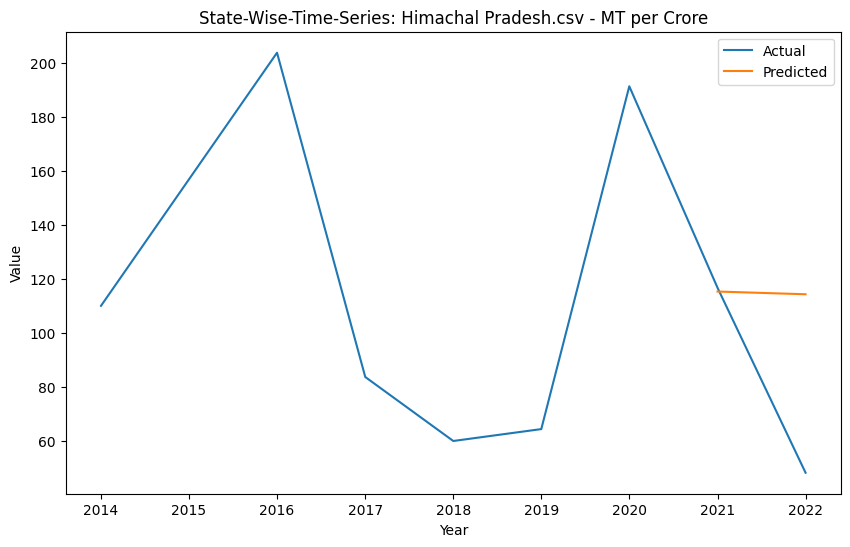

State-Wise-Time-Series: Himachal Pradesh.csv - MT per Crore RMSE: 46.68825404002726
Test series must contain at least 2 values.
State-Wise-Time-Series: Jammu & Kashmir.csv - MT per Crore not enough data for Linear Regression model


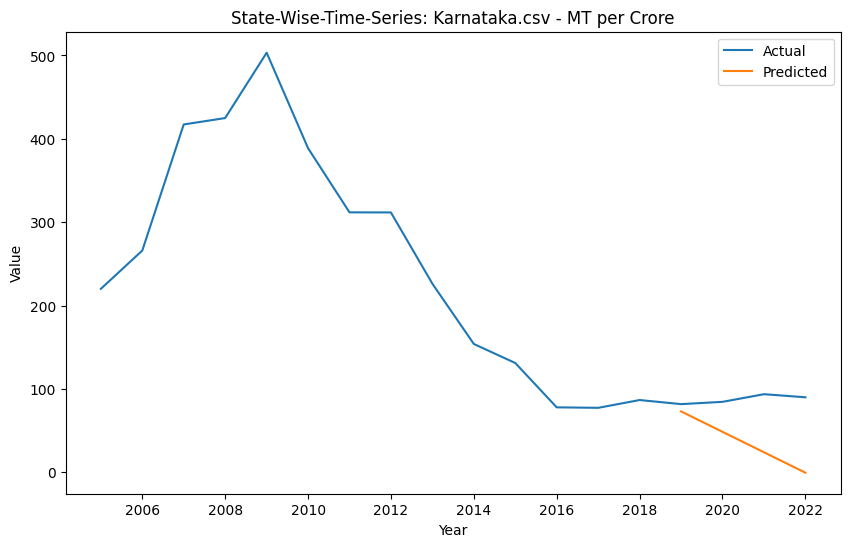

State-Wise-Time-Series: Karnataka.csv - MT per Crore RMSE: 60.02462135128724


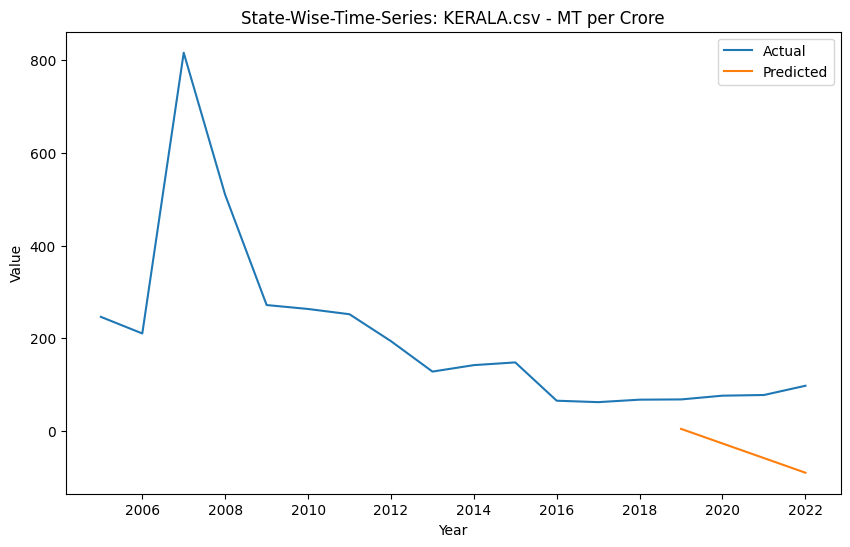

State-Wise-Time-Series: KERALA.csv - MT per Crore RMSE: 130.7348998699031


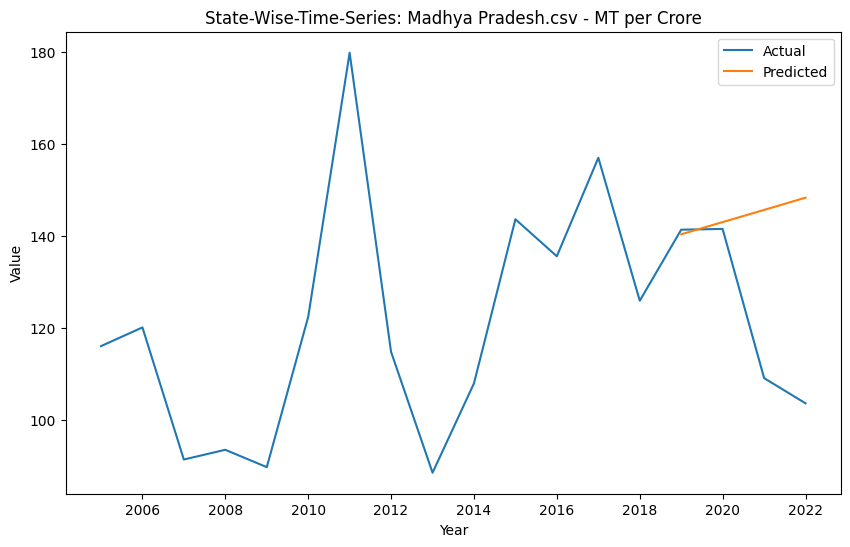

State-Wise-Time-Series: Madhya Pradesh.csv - MT per Crore RMSE: 28.859111168290358


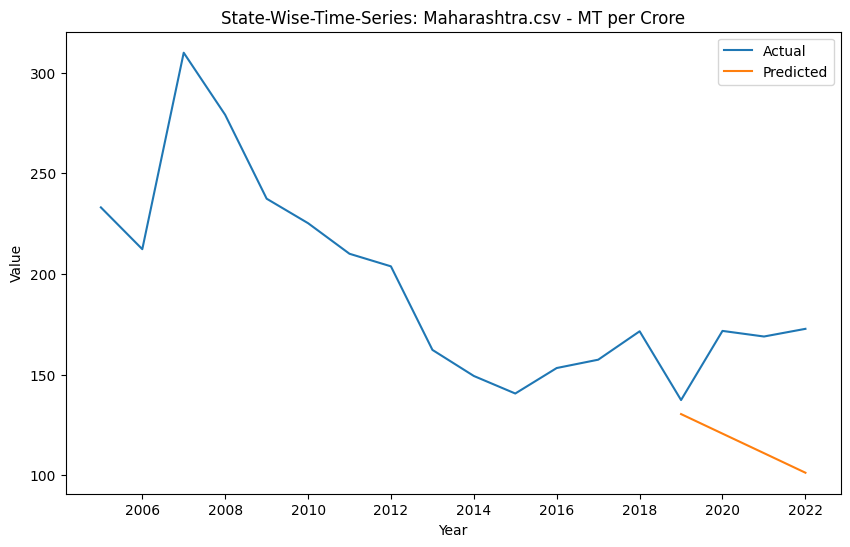

State-Wise-Time-Series: Maharashtra.csv - MT per Crore RMSE: 52.696825984592074


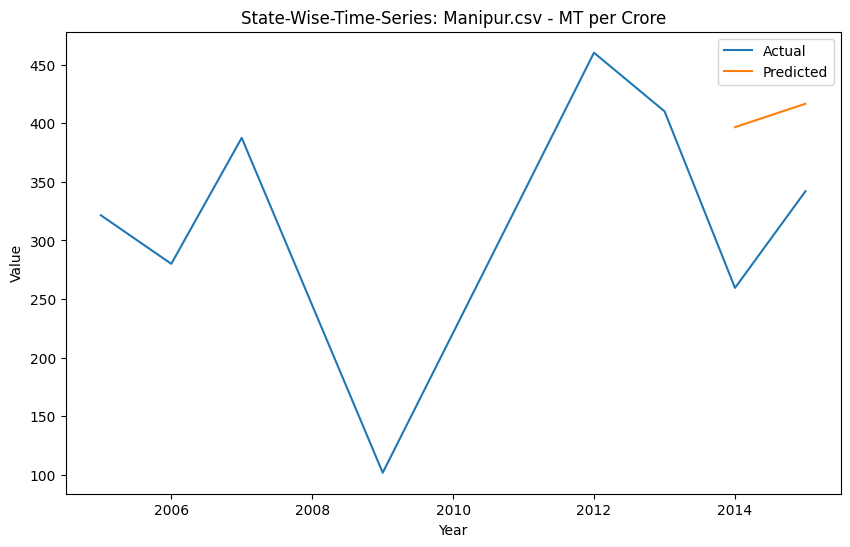

State-Wise-Time-Series: Manipur.csv - MT per Crore RMSE: 110.4256482962873


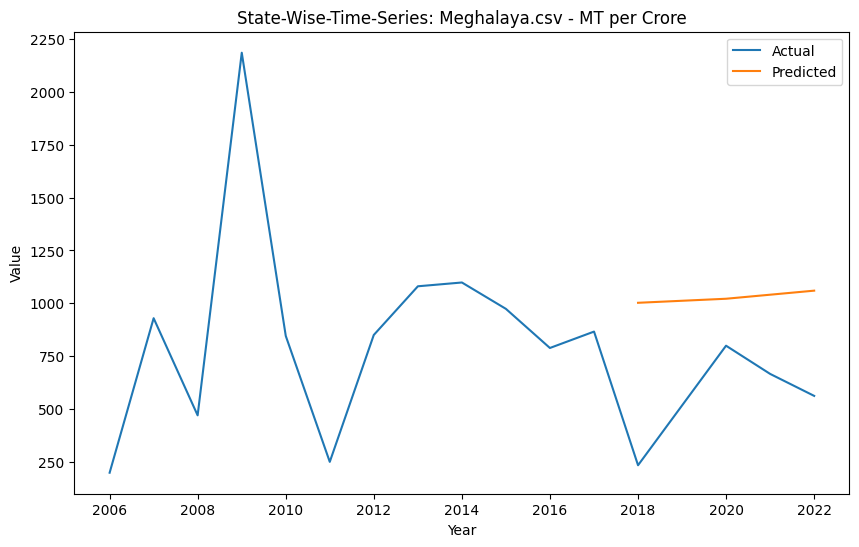

State-Wise-Time-Series: Meghalaya.csv - MT per Crore RMSE: 506.26631296896494
Test series must contain at least 2 values.
State-Wise-Time-Series: Mizoram.csv - MT per Crore not enough data for Linear Regression model


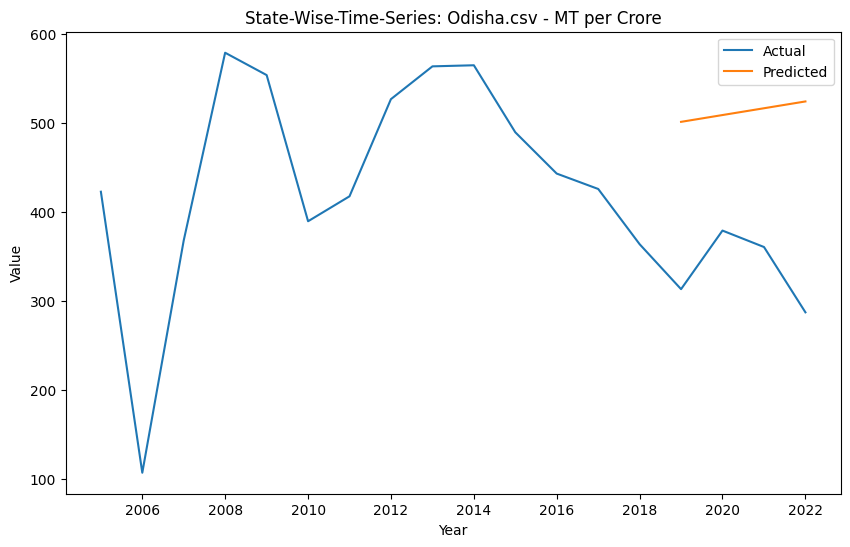

State-Wise-Time-Series: Odisha.csv - MT per Crore RMSE: 182.1013366647706


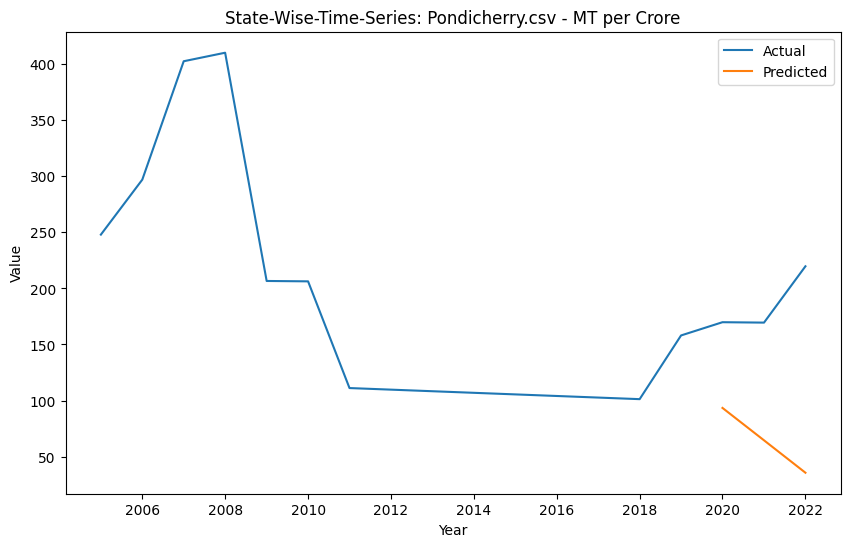

State-Wise-Time-Series: Pondicherry.csv - MT per Crore RMSE: 130.12558989050487


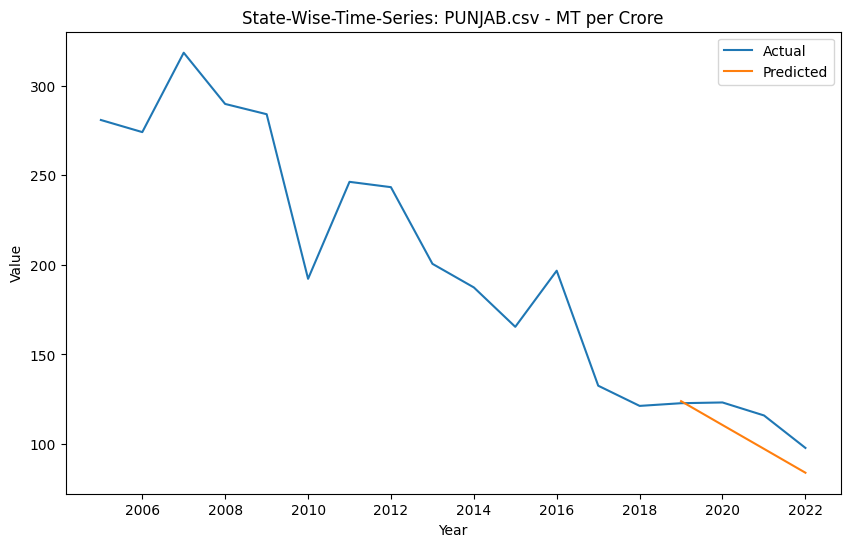

State-Wise-Time-Series: PUNJAB.csv - MT per Crore RMSE: 13.211523939194876


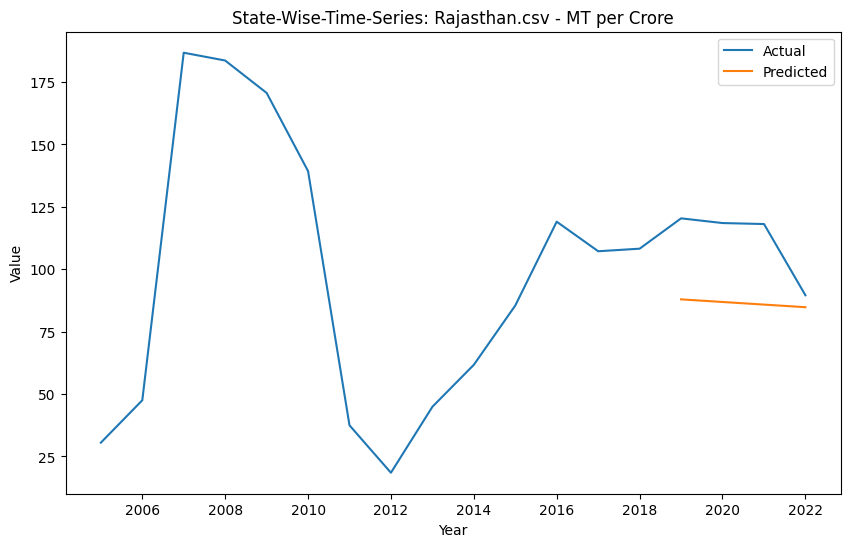

State-Wise-Time-Series: Rajasthan.csv - MT per Crore RMSE: 27.916627602318155


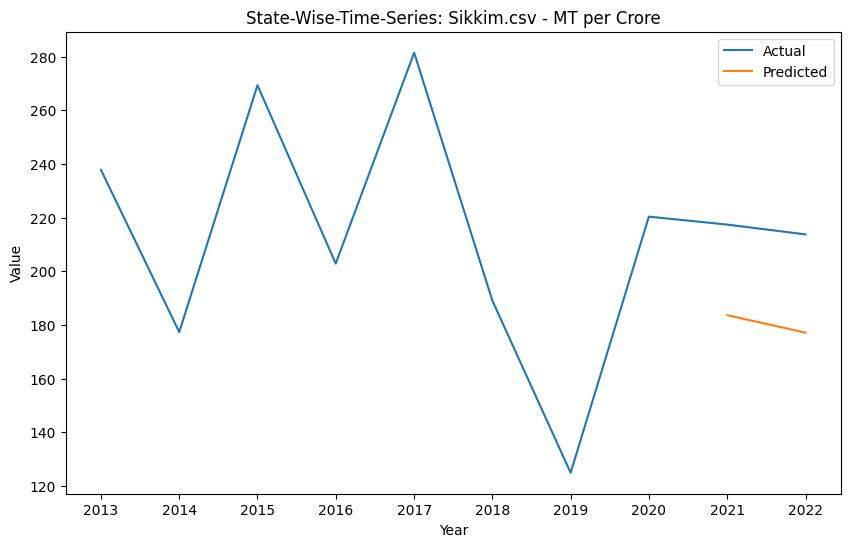

State-Wise-Time-Series: Sikkim.csv - MT per Crore RMSE: 35.2253545786861


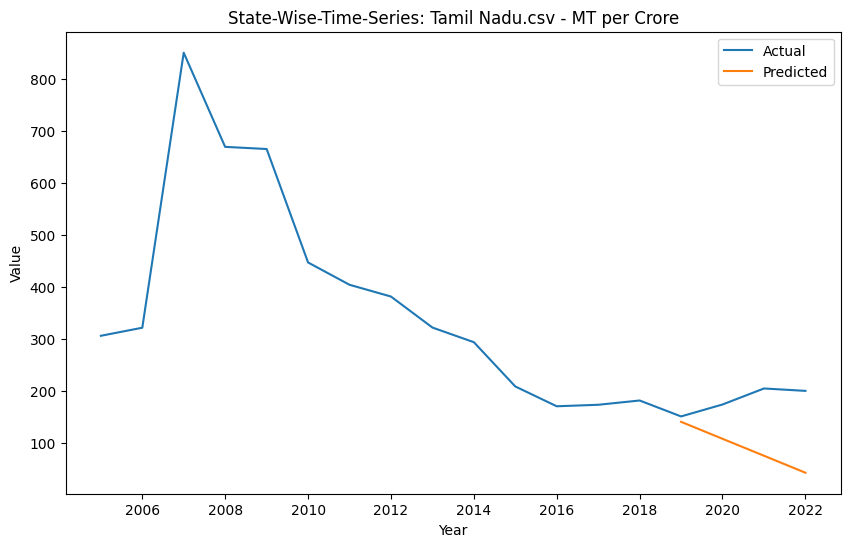

State-Wise-Time-Series: Tamil Nadu.csv - MT per Crore RMSE: 107.23072407530542


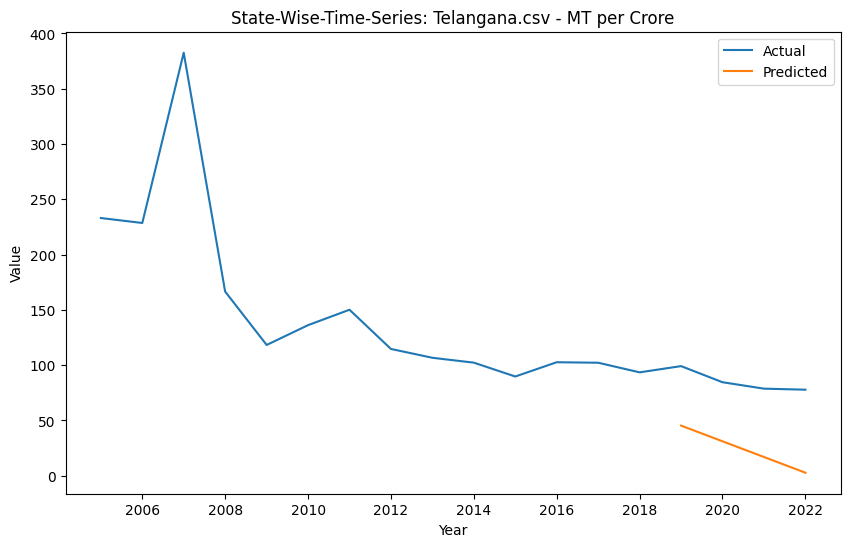

State-Wise-Time-Series: Telangana.csv - MT per Crore RMSE: 61.65581048954304


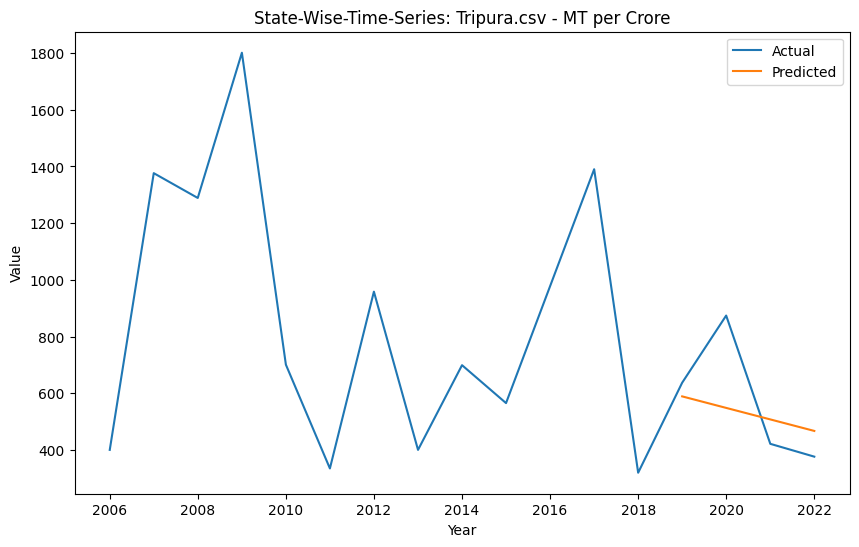

State-Wise-Time-Series: Tripura.csv - MT per Crore RMSE: 176.17699176057468
Test series must contain at least 2 values.
State-Wise-Time-Series: unspecified.csv - MT per Crore not enough data for Linear Regression model


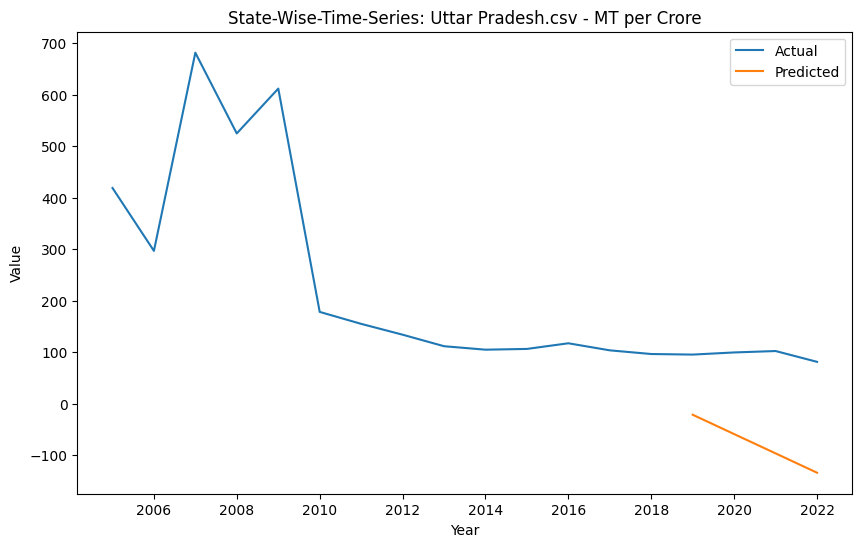

State-Wise-Time-Series: Uttar Pradesh.csv - MT per Crore RMSE: 176.431276606658


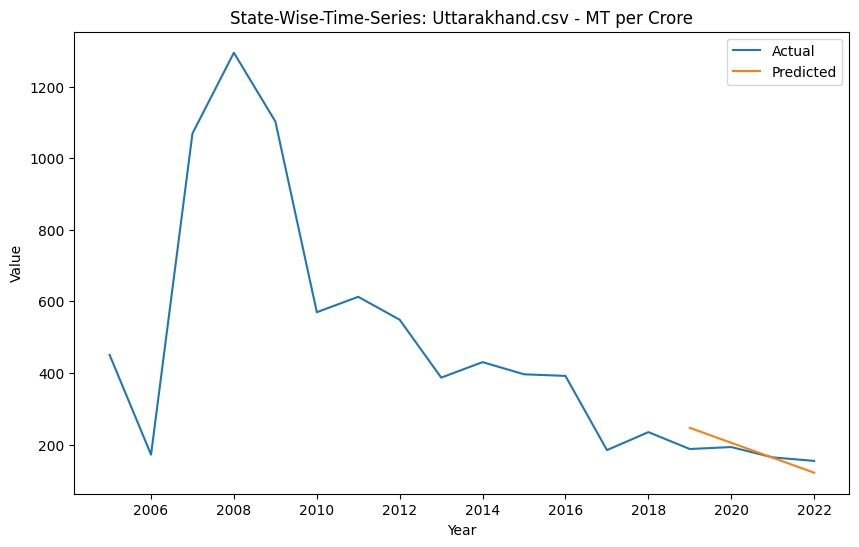

State-Wise-Time-Series: Uttarakhand.csv - MT per Crore RMSE: 34.39318607910264


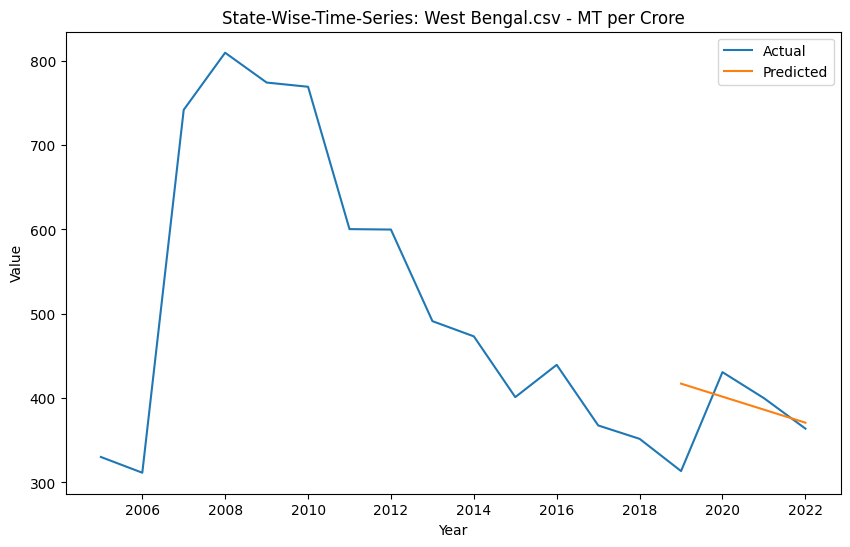

State-Wise-Time-Series: West Bengal.csv - MT per Crore RMSE: 54.391897687582


In [9]:
# Export Prediction State Wise

folders_to_process = ['State-Wise-Time-Series']

for folder_name in folders_to_process:
    folder_path = os.path.join(base_dir, folder_name)
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_name}' does not exist.")
        continue
    
    print(f"Processing data in folder: {folder_name}...")
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        if 'Year' in df.columns:
            if df['Year'].iloc[-1] == 'Total':
                df = df.iloc[:-1]
                df = df.iloc[:-1]
            # Handle cases where 'Year' column contains more than just the year
            df['Year'] = df['Year'].str.extract('(\d{4})', expand=False)
            df['Year'] = pd.to_datetime(df['Year'], format='%Y')
            df.set_index('Year', inplace=True)
        df = df[df["MT per Crore"] != 0]
        
        for column in df.columns:
            if column not in ['Year', '% Share(Qty)', '% Share(Rs)', 'Qty(MT)', 'Rs(Crore)']:
                predictions, rmse = fit_linear_regression(df[column])
                if predictions is not None:
                    plot_forecast(df[column], predictions, f"{folder_name}: {file_name} - {column}")
                    print(f"{folder_name}: {file_name} - {column} RMSE: {rmse}")
                else:
                    print(f"{folder_name}: {file_name} - {column} not enough data for Linear Regression model")


Processing data in folder: Port-Wise-Time-Series...


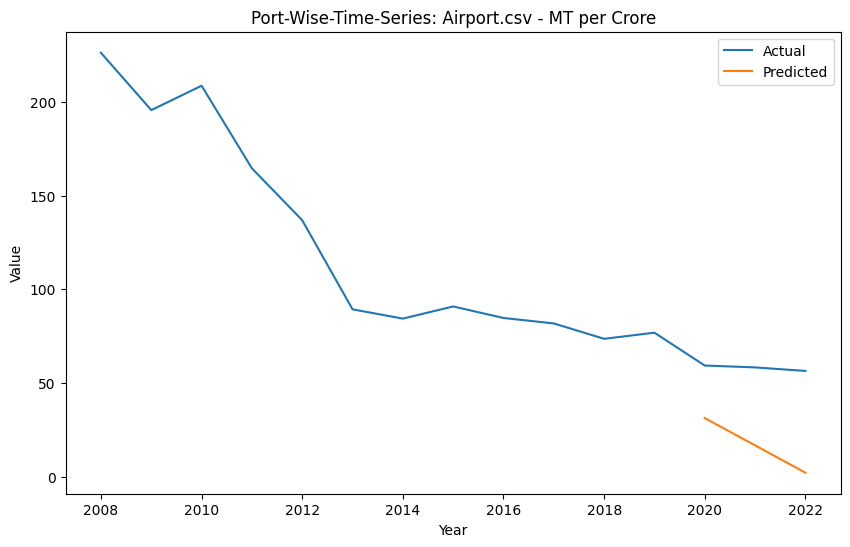

Port-Wise-Time-Series: Airport.csv - MT per Crore RMSE: 42.665370119660935


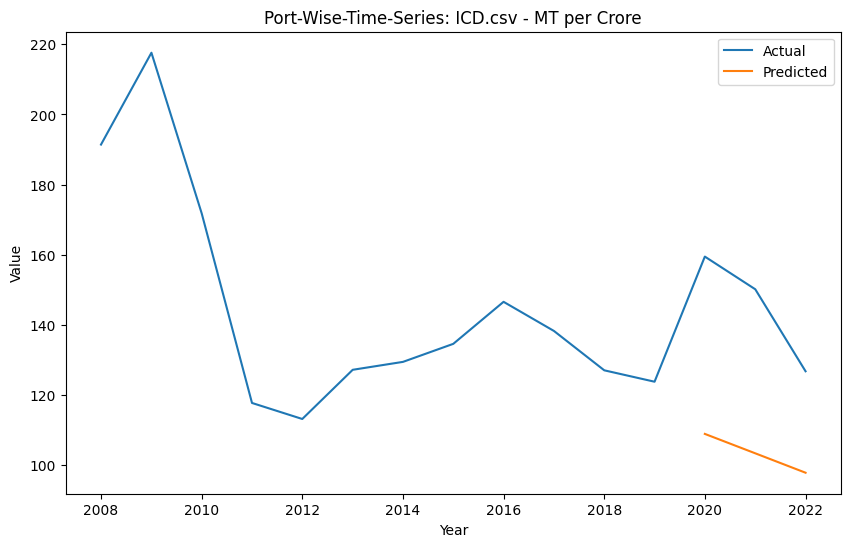

Port-Wise-Time-Series: ICD.csv - MT per Crore RMSE: 43.14678307033187


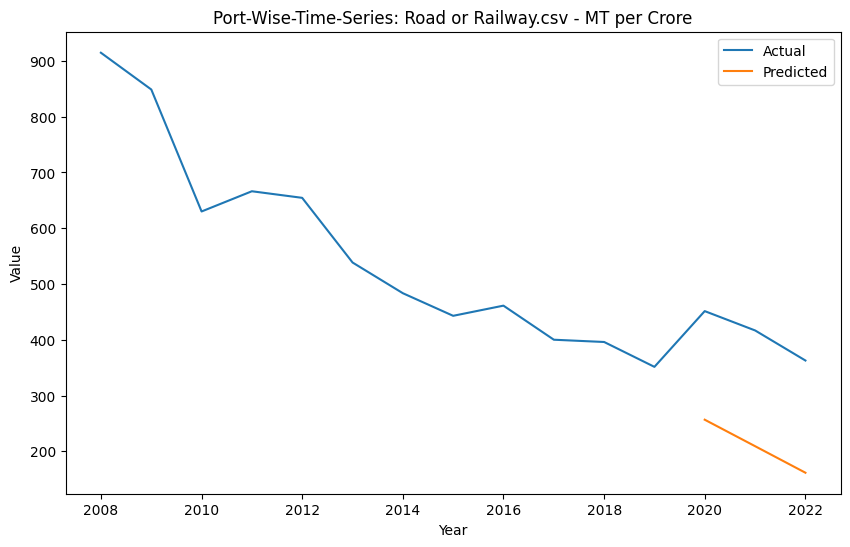

Port-Wise-Time-Series: Road or Railway.csv - MT per Crore RMSE: 201.1938713930603


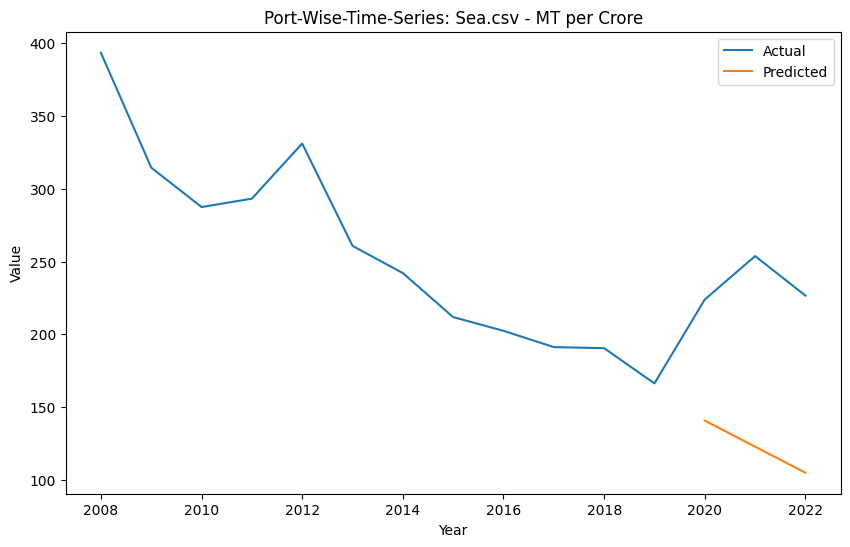

Port-Wise-Time-Series: Sea.csv - MT per Crore RMSE: 113.70781888662647


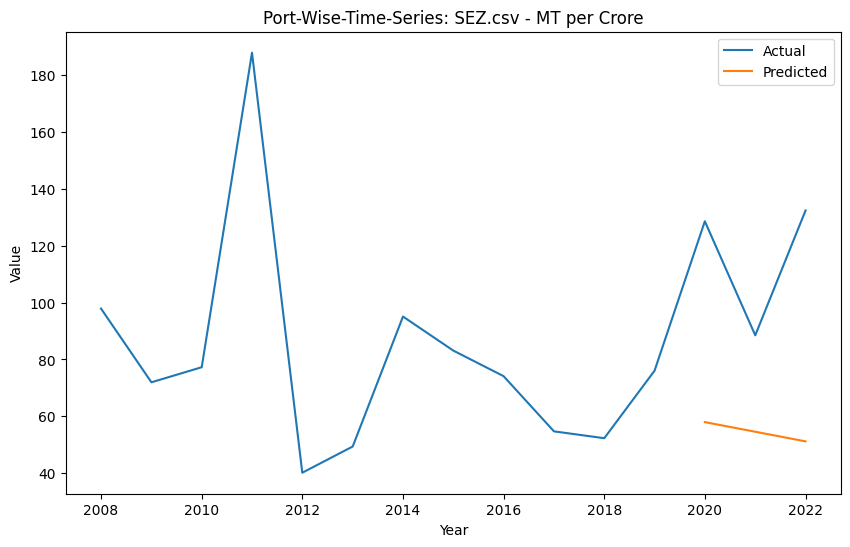

Port-Wise-Time-Series: SEZ.csv - MT per Crore RMSE: 65.08814337603133


In [11]:
# Export Prediction Port Wise

folders_to_process = ['Port-Wise-Time-Series']

for folder_name in folders_to_process:
    folder_path = os.path.join(base_dir, folder_name)
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_name}' does not exist.")
        continue
    
    print(f"Processing data in folder: {folder_name}...")
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        if 'Year' in df.columns:
            if df['Year'].iloc[-1] == 'Total':
                df = df.iloc[:-1]
                df = df.iloc[:-1]
            # Handle cases where 'Year' column contains more than just the year
            df['Year'] = df['Year'].str.extract('(\d{4})', expand=False)
            df['Year'] = pd.to_datetime(df['Year'], format='%Y')
            df.set_index('Year', inplace=True)
        df = df[df["MT per Crore"] != 0]
        
        for column in df.columns:
            if column not in ['Year', '% Share(Qty)', '% Share(Rs)', 'Qty(MT)', 'Rs(Crore)']:
                predictions, rmse = fit_linear_regression(df[column])
                if predictions is not None:
                    plot_forecast(df[column], predictions, f"{folder_name}: {file_name} - {column}")
                    print(f"{folder_name}: {file_name} - {column} RMSE: {rmse}")
                else:
                    print(f"{folder_name}: {file_name} - {column} not enough data for Linear Regression model")
